# Logical Post Selection for Quantum Sensing
## This notebook is for creating all data and figures related to logical post selection (LPS) for quantum sensing (QS)
### Final graphs should look something like:
![title](images/KitaevFidelity.png)
![title](images/KitaevDistance.png)
![title](images/KitaevLostinfo.png)
![title](images/Sensing Threshold (42,0.003).png)

imports

In [55]:
from qutip import *
from qiskit import *
import numpy as np
from simulators.BigStepSimulation import EfficientQuantumRegister
from simulators.SmallStepSimulation import InCoherentQuantumRegister
import matplotlib.pyplot as plt
import os
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
print('all packages imported')

all packages imported


The following cell defines all relevant constants, vectors and functions for this notebook

In [4]:
##########################################     defining the logical states      ########################################
z1 = tensor([basis(2,0) for i in range(5)])
z2 = tensor([basis(2,0) if i in {1,2,4} else basis(2,1) for i in range(5)])
z3 = tensor([basis(2,0) if i in {0,2,3} else basis(2,1) for i in range(5)])
z4 = tensor([basis(2,0) if i in {1,3,4} else basis(2,1) for i in range(5)])
z5 = tensor([basis(2,0) if i in {0,2,4} else basis(2,1) for i in range(5)])
z6 = tensor([basis(2,0) if i in {2} else basis(2,1) for i in range(5)])
z7 = tensor([basis(2,0) if i in {0,1,4} else basis(2,1) for i in range(5)])
z8 = tensor([basis(2,0) if i in {2,3,4} else basis(2,1) for i in range(5)])
z9 = tensor([basis(2,0) if i in {3} else basis(2,1) for i in range(5)])
z10 = tensor([basis(2,0) if i in {0,1,2} else basis(2,1) for i in range(5)])
z11 = tensor([basis(2,0) if i in {4} else basis(2,1) for i in range(5)])
z12 = tensor([basis(2,0) if i in {0} else basis(2,1) for i in range(5)])
z13 = tensor([basis(2,0) if i in {1,2,3} else basis(2,1) for i in range(5)])
z14 = tensor([basis(2,0) if i in {0,3,4} else basis(2,1) for i in range(5)])
z15 = tensor([basis(2,0) if i in {1} else basis(2,1) for i in range(5)])
z16 = tensor([basis(2,0) if i in {0,1,3} else basis(2,1) for i in range(5)])

o1 = tensor([basis(2,1) for i in range(5)])
o2 = tensor([basis(2,1) if i in {1,2,4} else basis(2,0) for i in range(5)])
o3 = tensor([basis(2,1) if i in {0,2,3} else basis(2,0) for i in range(5)])
o4 = tensor([basis(2,1) if i in {1,3,4} else basis(2,0) for i in range(5)])
o5 = tensor([basis(2,1) if i in {0,2,4} else basis(2,0) for i in range(5)])
o6 = tensor([basis(2,1) if i in {2} else basis(2,0) for i in range(5)])
o7 = tensor([basis(2,1) if i in {0,1,4} else basis(2,0) for i in range(5)])
o8 = tensor([basis(2,1) if i in {2,3,4} else basis(2,0) for i in range(5)])
o9 = tensor([basis(2,1) if i in {3} else basis(2,0) for i in range(5)])
o10 = tensor([basis(2,1) if i in {0,1,2} else basis(2,0) for i in range(5)])
o11 = tensor([basis(2,1) if i in {4} else basis(2,0) for i in range(5)])
o12 = tensor([basis(2,1) if i in {0} else basis(2,0) for i in range(5)])
o13 = tensor([basis(2,1) if i in {1,2,3} else basis(2,0) for i in range(5)])
o14 = tensor([basis(2,1) if i in {0,3,4} else basis(2,0) for i in range(5)])
o15 = tensor([basis(2,1) if i in {1} else basis(2,0) for i in range(5)])
o16 = tensor([basis(2,1) if i in {0,1,3} else basis(2,0) for i in range(5)])

logical_0 = 1/4*(z1+z2+z3+z4+z5-z6-z7-z8-z9-z10-z11-z12-z13-z14-z15+z16)
logical_1 = 1/4*(o1+o2+o3+o4+o5-o6-o7-o8-o9-o10-o11-o12-o13-o14-o15+o16)

# all single qubit errors
iiiii=tensor([qeye(2) for i in range(5)])
iiiix=tensor([qeye(2) if i!=4 else sigmax() for i in range(5)])
iiixi=tensor([qeye(2) if i!=3 else sigmax() for i in range(5)])
iixii=tensor([qeye(2) if i!=2 else sigmax() for i in range(5)])
ixiii=tensor([qeye(2) if i!=1 else sigmax() for i in range(5)])
xiiii=tensor([qeye(2) if i!=0 else sigmax() for i in range(5)])
iiiiz=tensor([qeye(2) if i!=4 else sigmaz() for i in range(5)])
iiizi=tensor([qeye(2) if i!=3 else sigmaz() for i in range(5)])
iizii=tensor([qeye(2) if i!=2 else sigmaz() for i in range(5)])
iziii=tensor([qeye(2) if i!=1 else sigmaz() for i in range(5)])
ziiii=tensor([qeye(2) if i!=0 else sigmaz() for i in range(5)])
iiiiy=tensor([qeye(2) if i!=4 else sigmay() for i in range(5)])
iiiyi=tensor([qeye(2) if i!=3 else sigmay() for i in range(5)])
iiyii=tensor([qeye(2) if i!=2 else sigmay() for i in range(5)])
iyiii=tensor([qeye(2) if i!=1 else sigmay() for i in range(5)])
yiiii=tensor([qeye(2) if i!=0 else sigmay() for i in range(5)])

################################################          defining registers               #########################
e='1'
# vector simulators
initial_state_for_PerfectLogicalRegisterWithFlags = tensor([basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,int(e))])
PerfectLogicalRegisterWithFlags = EfficientQuantumRegister(8,initial_state_for_PerfectLogicalRegisterWithFlags)

initial_state_for_PerfectLogicalRegister = tensor([basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,int(e))])
PerfectLogicalRegister = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)

initial_state_for_PerfectRegister = tensor([basis(2,0),basis(2,int(e))])
PerfectRegister = EfficientQuantumRegister(2,initial_state_for_PerfectRegister)

# parameters for noisy simulators
Tgate = 1
dt = Tgate/20
T1_usual_qubit = 1e4*Tgate # just a random value
T2_usual_qubit = 1e4*Tgate # just a random value
T1_sensor_qubit = 1e10*T1_usual_qubit # sensor qubit effectively does not decohere
T2_sensor_qubit = 1e10*T2_usual_qubit # sensor qubit effectively does not decohere
T1s = [T1_usual_qubit,T1_usual_qubit,T1_usual_qubit,T1_usual_qubit,T1_usual_qubit,T1_usual_qubit,T1_usual_qubit,T1_sensor_qubit]
T2s = [T2_usual_qubit,T2_usual_qubit,T2_usual_qubit,T2_usual_qubit,T2_usual_qubit,T2_usual_qubit,T2_usual_qubit,T2_sensor_qubit]

# noisy registers
initial_state_for_NoisyLogicalRegisterWithFlags = tensor([fock_dm(2,0),fock_dm(2,0),fock_dm(2,0),fock_dm(2,0),fock_dm(2,0),fock_dm(2,0),fock_dm(2,0),fock_dm(2,int(e))])
NoisyLogicalRegisterWithFlags = InCoherentQuantumRegister(8,initial_state_for_NoisyLogicalRegisterWithFlags,1,1,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)

initial_state_for_NoisyLogicalRegister = tensor([fock_dm(2,0),fock_dm(2,0),fock_dm(2,0),fock_dm(2,0),fock_dm(2,0),fock_dm(2,int(e))])
NoisyLogicalRegister = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,1,1,T1s=T1s[2:],T2s=T2s[2:],dt=dt,Tgate=Tgate)

initial_state_for_NoisyRegister = tensor([fock_dm(2,0), fock_dm(2,int(e))])
NoisyRegister = InCoherentQuantumRegister(2,initial_state_for_NoisyRegister,1,1,T1s=T1s[6:],T2s=T2s[6:],dt=dt,Tgate=Tgate)

here I write functions that serve as helpers for the logical with and without flag procedures, given the full register

In [5]:
def debugLogical(state):
    """
    :param state: register state for the 5 qubit code+sensor as density matrix
    :return: logical density matrix
    """
    zLz = tensor([logical_0,basis(2,0)])
    oLz = tensor([logical_1,basis(2,0)])
    zLo = tensor([logical_0,basis(2,1)])
    oLo = tensor([logical_1,basis(2,1)])

    a00 = (zLz.dag()*state*zLz).data[0,0]
    a01 = (zLz.dag()*state*zLo).data[0,0]
    a02 = (zLz.dag()*state*oLz).data[0,0]
    a03 = (zLz.dag()*state*oLo).data[0,0]
    a10 = (zLo.dag()*state*zLz).data[0,0]
    a11 = (zLo.dag()*state*zLo).data[0,0]
    a12 = (zLo.dag()*state*oLz).data[0,0]
    a13 = (zLo.dag()*state*oLo).data[0,0]
    a20 = (oLz.dag()*state*zLz).data[0,0]
    a21 = (oLz.dag()*state*zLo).data[0,0]
    a22 = (oLz.dag()*state*oLz).data[0,0]
    a23 = (oLz.dag()*state*oLo).data[0,0]
    a30 = (oLo.dag()*state*zLz).data[0,0]
    a31 = (oLo.dag()*state*zLo).data[0,0]
    a32 = (oLo.dag()*state*oLz).data[0,0]
    a33 = (oLo.dag()*state*oLo).data[0,0]

    return Qobj(np.array([[a00,a01,a02,a03],[a10,a11,a12,a13],[a20,a21,a22,a23],[a30,a31,a32,a33]]), dims=[[2,2],[2,2]])

def applyOperator(reg,noisy,Operator):
    """
    applies operator on register
    :param reg: quantum register
    :param noisy: boolean - True for noisy register
    :param Operator: the operator to apply
    :return: None
    """
    if not noisy:
        reg.state = Operator*reg.state # apply permutation
    else:
        reg.state = Operator*reg.state*Operator.dag() # apply permutation

def H_for_LogicalRegister(reg, noisy):
    """
    runs logical hadamard for logical register with sensor qubit
    :param reg: quantum register object
    :param noisy: boolean - True for noisy register
    :return: None
    """
    perm = qiskit.circuit.library.Permutation(5,pattern=[3,0,2,4,1])
    operator = Qobj(qiskit.quantum_info.operators.Operator(perm).data, dims = [[2 for i in range(5)],[2 for i in range(5)]])
    reg.run([[('H',0,None,None),('H',1,None,None),('H',2,None,None),('H',3,None,None),('H',4,None,None)]])
    applyOperator(reg,noisy,-tensor([operator,qeye(2)]))

def prepare_for_LogicalRegister(reg,noisy):
    """
    runs logical state preperation for logical register with sensor qubit
    :param reg: quantum register object
    :param noisy: boolean - True for noisy register
    :return: None
    """
    # prepare |+++++>
    reg.run([[('H',0,None,None),('H',1,None,None),('H',2,None,None),('H',3,None,None),('H',4,None,None)]])
    # do black actions
    reg.run([[('CZ',0,1,None),('CZ',2,3,None)],[('CZ',1,2,None),('CZ',3,4,None)],[('CZ',0,4,None)]])
    # repair from |-> to |0>
    H_for_LogicalRegister(reg, noisy)
    reg.run([[('X',0,None,None),('X',1,None,None),('X',2,None,None),('X',3,None,None),('X',4,None,None)]])

def FTprepare_for_LogicalRegister(reg, noisy):
    state = reg.state
    dephase = reg.dephase
    amp = reg.amplitude_damp
    register = InCoherentQuantumRegister(8, tensor([fock_dm(2,0), fock_dm(2,0), state]), reg.T1, reg.T2, T1s=[reg.T1[0]]+[reg.T1[1]]+reg.T1, T2s=[reg.T2[0]]+[reg.T2[1]]+reg.T2, dt=reg.dt, Tgate=reg.Tgate)
    register.dephase = dephase
    register.amplitude_damp = amp
    while True:
        # prepare |+++++>
        register.run([[('H',2,None,None),('H',3,None,None),('H',4,None,None),('H',5,None,None),('H',6,None,None)]])
        # do black actions
        register.run([[('CZ',2,3,None),('CZ',4,5,None)],[('CZ',3,4,None),('CZ',5,6,None)],[('CZ',2,6,None)]])
        # do first flag
        register.run([[('H',1,None,None)],[('CNOT',2,1,None)],[('CNOT',0,1,None)],[('CZ',1,3,None)],[('CNOT',0,1,None)],[('CZ',1,6,None)],[('H',1,None,None)]])
        res, p, results = register.measure([0,1],update=True,showHistogram=True)
        if res != '00':
            continue
        # do second flag
        register.run([[('H',1,None,None)],[('CZ',2,1,None)],[('CNOT',0,1,None)],[('CNOT',3,1,None)],[('CNOT',0,1,None)],[('CZ',1,4,None)],[('H',1,None,None)]])
        res, p, results = register.measure([0,1],update=True,showHistogram=True)
        if res != '00':
            continue
        register.run([[('H',1,None,None)],[('CNOT',5,1,None)],[('CNOT',0,1,None)],[('CZ',4,1,None)],[('CNOT',0,1,None)],[('CZ',6,1,None)],[('H',1,None,None)]])
        res, p, results = register.measure([0,1],update=True,showHistogram=True)
        if res != '00':
            continue
        break

    state = register.state.ptrace([2,3,4,5,6,7])
    reg.update(state)
    # repair from |-> to |0>
    H_for_LogicalRegister(reg, noisy)
    reg.run([[('X',0,None,None),('X',1,None,None),('X',2,None,None),('X',3,None,None),('X',4,None,None)]])

def FTEC_for_LogicalRegister(register, noisy, LPS=True):
    state = register.state
    dephase = register.dephase
    amp = register.amplitude_damp
    reg = InCoherentQuantumRegister(7, tensor([state,fock_dm(2,0)]), register.T1, register.T2, T1s=register.T1+[register.T1[1]], T2s=register.T2+[register.T2[1]], dt=register.dt, Tgate=register.Tgate)
    reg.dephase = dephase
    reg.amplitude_damp = amp
    perfect = False

    ## use sensor qubit as measurement qubit - set it in the |0> state assuming it is in |1>
    if e=='1':
        applyOperator(reg,noisy,reg.Sx[5]) # update mes qubit to be in state 0

    # extract syndrome
    syndrome = ''

    def messureANDcollapse(LPS):
        if LPS:
            project = reg.qI

            ########## do logical post selection by forcing each generator to measure trivially, ##########
            ##########         and dont normalize the state to gather lost information           ##########

            project *= (reg.qI+reg.Sz[5])/2*(reg.qI+reg.Sz[6])/2 #IIIII|0><0|0><0|
            applyOperator(reg,noisy,project) #                       sensor | flag
            return '0'
        else:
            project = reg.qI
            project *= (reg.qI+reg.Sz[6])/2 #IIIIII|0><0|
            applyOperator(reg,noisy,project) #      flag
            mes_qubit_state = reg.state.ptrace([5])
            p0 = mes_qubit_state[0,0]
            p1 = mes_qubit_state[1,1]
            project = reg.qI
            normalize = reg.state.tr()
            a = np.random.rand()
            b = np.random.rand()
            c = np.random.rand()
            FTmes = (((a < p0) and (b < p0)) or ((a < p0) and (c < p0)) or ((c < p0) and (b < p0)))
            if FTmes:
                project *= (reg.qI+reg.Sz[5])/2 #I..I|0><0|I..I
                applyOperator(reg,noisy,project)
                reg.state = reg.state.unit()*normalize
                return '0'
            else:
                project *= (reg.qI-reg.Sz[5])/2 #I..I|1><1|I..I
                applyOperator(reg,noisy,project)
                reg.state = reg.state.unit()*normalize
                applyOperator(reg,noisy,reg.Sx[5]) # update mes qubit to be in state 0
                return '1'

    dephase = reg.dephase
    amp = reg.amplitude_damp
    if (noisy and perfect):
        reg.setError(dephase=False,amplitude_damp=False)

    # g1 syndrome extraction
    # gates
    reg.run([[('H',6,None,None),('H',0,None,None)]])
    reg.run([[('CNOT',5,0,None)]])
    reg.run([[('CNOT', 5, 6, None),('H',0,None,None)]])
    reg.run([[('CNOT',5,1,None)]])
    reg.run([[('CNOT',5,2,None)]])
    reg.run([[('CNOT', 5, 6, None),('H',3,None,None)]])
    reg.run([[('CNOT',5,3,None)]])
    reg.run([[('H',6,None,None),('H',3,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # g2 syndrome extraction
    # gates
    reg.run([[('H',6,None,None),('H',1,None,None)]])
    reg.run([[('CNOT',5,1,None)]])
    reg.run([[('CNOT', 5, 6, None),('H',1,None,None)]])
    reg.run([[('CNOT',5,2,None)]])
    reg.run([[('CNOT',5,3,None)]])
    reg.run([[('CNOT', 5, 6, None),('H',4,None,None)]])
    reg.run([[('CNOT',5,4,None)]])
    reg.run([[('H',6,None,None),('H',4,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # g3 syndrome extraction
    # gates
    reg.run([[('H',6,None,None),('H',0,None,None)]])
    reg.run([[('CNOT',5,0,None)]])
    reg.run([[('CNOT', 5, 6, None),('H',0,None,None),('H',2,None,None)]])
    reg.run([[('CNOT',5,2,None)]])
    reg.run([[('CNOT',5,3,None),('H',2,None,None)]])
    reg.run([[('CNOT',5,6,None)]])
    reg.run([[('CNOT',5,4,None),('H',6,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # g4 syndrome extraction
    # gates
    reg.run([[('CNOT',5,0,None),('H',6,None,None)]])
    reg.run([[('CNOT',5,6,None),('H',1,None,None)]])
    reg.run([[('CNOT',5,1,None),('H',3,None,None)]])
    reg.run([[('CNOT',5,3,None),('H',1,None,None)]])
    reg.run([[('CNOT',5,6,None),('H',3,None,None)]])
    reg.run([[('CNOT',5,4,None),('H',6,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # print(syndrome)

    # do recovery
    recovery = tensor([qeye(2) for i in range(7)])
    if syndrome == '0001':
        recovery = tensor([qeye(2) if i!=0 else sigmax() for i in range(7)])
    elif syndrome == '0010':
        recovery = tensor([qeye(2) if i!=2 else sigmaz() for i in range(7)])
    elif syndrome == '0011':
        recovery = tensor([qeye(2) if i!=4 else sigmax() for i in range(7)])
    elif syndrome == '0100':
        recovery = tensor([qeye(2) if i!=4 else sigmaz() for i in range(7)])
    elif syndrome == '0101':
        recovery = tensor([qeye(2) if i!=1 else sigmaz() for i in range(7)])
    elif syndrome == '0110':
        recovery = tensor([qeye(2) if i!=3 else sigmax() for i in range(7)])
    elif syndrome == '0111':
        recovery = tensor([qeye(2) if i!=4 else sigmay() for i in range(7)])
    elif syndrome == '1000':
        recovery = tensor([qeye(2) if i!=1 else sigmax() for i in range(7)])
    elif syndrome == '1001':
        recovery = tensor([qeye(2) if i!=3 else sigmaz() for i in range(7)])
    elif syndrome == '1010':
        recovery = tensor([qeye(2) if i!=0 else sigmaz() for i in range(7)])
    elif syndrome == '1011':
        recovery = tensor([qeye(2) if i!=0 else sigmay() for i in range(7)])
    elif syndrome == '1100':
        recovery = tensor([qeye(2) if i!=2 else sigmax() for i in range(7)])
    elif syndrome == '1101':
        recovery = tensor([qeye(2) if i!=1 else sigmay() for i in range(7)])
    elif syndrome == '1110':
        recovery = tensor([qeye(2) if i!=2 else sigmay() for i in range(7)])
    elif syndrome == '1111':
        recovery = tensor([qeye(2) if i!=3 else sigmay() for i in range(7)])

    applyOperator(reg,noisy,recovery)

    ## return sensor qubit to eigenstate
    if e=='1':
        applyOperator(reg,noisy,reg.Sx[5]) # update mes qubit to be in state 1

    if (noisy and perfect):
        reg.setError(dephase=dephase,amplitude_damp=amp)

        #return to 6 qubit register
    state = reg.state.ptrace([0,1,2,3,4,5])
    register.update(state)

def EC_for_LogicalRegister(reg, noisy, perfect=False, LPS=True):
    """
    runs full error correction (syndrome measurement+correction) for logical register with sensor qubit.
    the error correction here is not fault-tolerant.
    :param reg: quantum register
    :param noisy: boolean - True for noisy register
    :param perfect: boolean - True if we want the qubit not to decohere when performing EC
    :return: None
    assuming qubits 0-4 are logicl and qubit 5 is sensor
    """
    # print('entering error correction')
    ## use sensor qubit as measurement qubit - set it in the |0> state assuming it is in |1>
    if e=='1':
        applyOperator(reg,noisy,reg.Sx[5]) # update mes qubit to be in state 0

    # extract syndrome
    syndrome = ''

    def messureANDcollapse(LPS):
        if LPS:
            project = reg.qI

            ########## do logical post selection by forcing each generator to measure trivially, ##########
            ##########         and dont normalize the state to gather lost information           ##########

            project *= (reg.qI+reg.Sz[5])/2 #IIIII|0><0|
            applyOperator(reg,noisy,project) #    sensor
            return '0'
        else:
            mes_qubit_state = reg.state.ptrace([5])
            p0 = mes_qubit_state[0,0]
            p1 = mes_qubit_state[1,1]
            project = reg.qI
            normalize = reg.state.tr()
            # print(normalize)
            if np.random.rand() < p0:
                project *= (reg.qI+reg.Sz[5])/2 #I..I|0><0|I..I
                applyOperator(reg,noisy,project)
                reg.state = reg.state.unit()*normalize
                return '0'
            else:
                project *= (reg.qI-reg.Sz[5])/2 #I..I|1><1|I..I
                applyOperator(reg,noisy,project)
                reg.state = reg.state.unit()*normalize
                applyOperator(reg,noisy,reg.Sx[5]) # update mes qubit to be in state 0
                return '1'


    dephase = reg.dephase
    amp = reg.amplitude_damp
    if (noisy and perfect):
        reg.setError(dephase=False,amplitude_damp=False)

    # g1 syndrome extraction
    # gates
    reg.run([[('H',5,None,None)]])
    reg.run([[('CNOT',0,5,None)]])
    reg.run([[('CZ',1,5,None)]])
    reg.run([[('CZ',2,5,None)]])
    reg.run([[('CNOT',3,5,None)]])
    reg.run([[('H',5,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # g2 syndrome extraction
    # gates
    reg.run([[('H',5,None,None)]])
    reg.run([[('CNOT',1,5,None)]])
    reg.run([[('CZ',2,5,None)]])
    reg.run([[('CZ',3,5,None)]])
    reg.run([[('CNOT',4,5,None)]])
    reg.run([[('H',5,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # g3 syndrome extraction
    # gates
    reg.run([[('H',5,None,None)]])
    reg.run([[('CNOT',0,5,None)]])
    reg.run([[('CNOT',2,5,None)]])
    reg.run([[('CZ',3,5,None)]])
    reg.run([[('CZ',4,5,None)]])
    reg.run([[('H',5,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # g4 syndrome extraction
    # gates
    reg.run([[('H',5,None,None)]])
    reg.run([[('CZ',0,5,None)]])
    reg.run([[('CNOT',1,5,None)]])
    reg.run([[('CNOT',3,5,None)]])
    reg.run([[('CZ',4,5,None)]])
    reg.run([[('H',5,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # print(syndrome)

    # do recovery
    recovery = tensor([qeye(2) for i in range(6)])
    if syndrome == '0001':
        recovery = tensor([qeye(2) if i!=0 else sigmax() for i in range(6)])
    elif syndrome == '0010':
        recovery = tensor([qeye(2) if i!=2 else sigmaz() for i in range(6)])
    elif syndrome == '0011':
        recovery = tensor([qeye(2) if i!=4 else sigmax() for i in range(6)])
    elif syndrome == '0100':
        recovery = tensor([qeye(2) if i!=4 else sigmaz() for i in range(6)])
    elif syndrome == '0101':
        recovery = tensor([qeye(2) if i!=1 else sigmaz() for i in range(6)])
    elif syndrome == '0110':
        recovery = tensor([qeye(2) if i!=3 else sigmax() for i in range(6)])
    elif syndrome == '0111':
        recovery = tensor([qeye(2) if i!=4 else sigmay() for i in range(6)])
    elif syndrome == '1000':
        recovery = tensor([qeye(2) if i!=1 else sigmax() for i in range(6)])
    elif syndrome == '1001':
        recovery = tensor([qeye(2) if i!=3 else sigmaz() for i in range(6)])
    elif syndrome == '1010':
        recovery = tensor([qeye(2) if i!=0 else sigmaz() for i in range(6)])
    elif syndrome == '1011':
        recovery = tensor([qeye(2) if i!=0 else sigmay() for i in range(6)])
    elif syndrome == '1100':
        recovery = tensor([qeye(2) if i!=2 else sigmax() for i in range(6)])
    elif syndrome == '1101':
        recovery = tensor([qeye(2) if i!=1 else sigmay() for i in range(6)])
    elif syndrome == '1110':
        recovery = tensor([qeye(2) if i!=2 else sigmay() for i in range(6)])
    elif syndrome == '1111':
        recovery = tensor([qeye(2) if i!=3 else sigmay() for i in range(6)])

    applyOperator(reg,noisy,recovery)

    ## return sensor qubit to eigenstate
    if e=='1':
        applyOperator(reg,noisy,reg.Sx[5]) # update mes qubit to be in state 1

    if (noisy and perfect):
        reg.setError(dephase=dephase,amplitude_damp=amp)

def logicalCNOT(reg):
    """
    assumes control is logical 5 qubit in indexes 0-4
    """
    reg.run([[('H', 5, None, None)]])
    # print(debugLogical(reg.state))
    reg.run([[('CZ', 5, 0, None)],[('CZ', 5, 1, None)],[('CZ', 5, 2, None)],[('CZ', 5, 3, None)],[('CZ', 5, 4, None)]])
    reg.run([[('H', 5, None, None)]])

def flaggedCNOT(reg):
    state = reg.state
    dephase = reg.dephase
    amp = reg.amplitude_damp
    register = InCoherentQuantumRegister(8, tensor([fock_dm(2,0), fock_dm(2,0), state]), reg.T1, reg.T2, T1s=[reg.T1[0]]+[reg.T1[1]]+reg.T1, T2s=[reg.T2[0]]+[reg.T2[1]]+reg.T2, dt=reg.dt, Tgate=reg.Tgate)
    register.dephase = dephase
    register.amplitude_damp = amp
    # state = register.state.ptrace([2,3,4,5,6,7])
    # print(debugLogical(state))
    register.run([[('H',7,None,None)]])


    for i in [2,3,4,5,6]:
        # i CZ gadget application
        register.run([[('H',0,None,None)]])
        register.run([[('CNOT',i,0,None),('CNOT', 1, 7, None)],[('CZ',7,i,None)],[('CZ',0,7,None)],[('CNOT',i,0,None),('CNOT', 1, 7, None)]])
        register.run([[('H',0,None,None)]])
        # first CZ measurement without normalizing
        res, p, results = register.measure([0,1],update=True,showHistogram=False)

    register.run([[('H',7,None,None)]])

    #return to 6 qubit register
    state = register.state.ptrace([2,3,4,5,6,7])
    reg.update(state)

def flaggedImprovedCNOT(reg):
    state = reg.state
    dephase = reg.dephase
    amp = reg.amplitude_damp
    register = InCoherentQuantumRegister(8, tensor([fock_dm(2,0), fock_dm(2,0), state]), reg.T1, reg.T2, T1s=[reg.T1[0]]+[reg.T1[1]]+reg.T1, T2s=[reg.T2[0]]+[reg.T2[1]]+reg.T2, dt=reg.dt, Tgate=reg.Tgate)
    register.dephase = dephase
    register.amplitude_damp = amp
    # state = register.state.ptrace([2,3,4,5,6,7])
    # print(debugLogical(state))
    register.run([[('H',7,None,None),('H',0,None,None)]])
    register.run([[('CNOT', 1, 7, None)]])
    register.run([[('CNOT', 7, 0, None)]])
    for i in [2,3,4,5,6]:
        register.run([[('CZ',7,i,None)]])
    for i in [2,3,4,5,6]:
        register.run([[('CZ',i,0,None)]])
    register.run([[('CNOT', 7, 0, None)]])
    register.run([[('CNOT', 1, 7, None)]])
    register.run([[('H',7,None,None),('H',0,None,None)]])
    # measure without normalizing
    res, p, results = register.measure([0,1],update=True,showHistogram=False)

    #return to 6 qubit register
    state = register.state.ptrace([2,3,4,5,6,7])
    reg.update(state)

def cU_for_LogicalRegister(reg,phi,type='logical'):
    """
    runs logical controlled operation for logical register with sensor qubit
    :param reg: quantum register object
    :param noisy: boolean - True for noisy register
    :param phi: such that 2*pi*phi is the eigenphase
    :return: None
    """
    # first sensor rotation
    reg.run([[('SingleQubitOperator',5,None,(-1j*phi/8*sigmaz()).expm())]])
    if type == 'logical':
        # controlled not
        reg.run([[('CNOT', 5, 0, None),('CNOT', 5, 1, None),('CNOT', 5, 2, None),('CNOT', 5, 3, None),('CNOT', 5, 4, None)]])
    elif type == 'FTflagged':
        flaggedCNOT(reg)
    else: #type=='improved'
        flaggedImprovedCNOT(reg)
    # second sensor rotation
    reg.run([[('SingleQubitOperator',5,None,(1j*phi/4*sigmaz()).expm())]])
    if type == 'logical':
        # controlled not
        reg.run([[('CNOT', 5, 0, None),('CNOT', 5, 1, None),('CNOT', 5, 2, None),('CNOT', 5, 3, None),('CNOT', 5, 4, None)]])
    elif type == 'FTflagged':
        flaggedCNOT(reg)
    else: #type=='improved'
        flaggedImprovedCNOT(reg)
    # third sensor rotation
    reg.run([[('SingleQubitOperator',5,None,(-1j*phi/8*sigmaz()).expm())]])

def rotation_for_LogicalRegister(reg,theta):
    """
    runs logical Z rotation for logical register with sensor qubit
    :param reg: quantum register object
    :param noisy: boolean - True for noisy register
    :param theta: the angle for rotation
    :return: None
    """
    K = Qobj(1/np.sqrt(2)*np.array([[1,1],[1j,-1j]]))
    reg.run([[('SingleQubitOperator',0,None,K),('Y',2,None,None),('SingleQubitOperator',4,None,K)]])
    reg.run([[('CNOT', 2, 4, None)]])
    reg.run([[('CNOT', 2, 0, None)]])
    reg.run([[('SingleQubitOperator', 2, None, (-1j*theta/2*sigmaz()).expm())]])
    reg.run([[('CNOT', 2, 0, None)]])
    reg.run([[('CNOT', 2, 4, None)]])
    reg.run([[('SingleQubitOperator',0,None,K.dag()),('Y',2,None,None),('SingleQubitOperator',4,None,K.dag())]])

def rotation_for_flaggedImprovedLogicalRegister(register,theta,noisy=True):
    """
    runs logical Z rotation for logical register with sensor qubit and flag qubits. Z flag is qubit 0, X flag is qubit 1
    works only for noisy registers!
    :param reg: quantum register object, without flags
    :param noisy: boolean - True for noisy register
    :param theta: the angle for rotation
    :return: None
    """
    K = Qobj(1/np.sqrt(2)*np.array([[1,1],[1j,-1j]]))
    h = Qobj(1/np.sqrt(2)*np.array([[1,1],[1,-1]]))
    while True:
        state = register.state # 6 qubit state
        if noisy:
            dephase = register.dephase
            amp = register.amplitude_damp
            reg = InCoherentQuantumRegister(8, tensor([fock_dm(2,0), fock_dm(2,0), state]), register.T1, register.T2, T1s=[register.T1[0]]+[register.T1[1]]+register.T1, T2s=[register.T2[0]]+[register.T2[1]]+register.T2, dt=register.dt, Tgate=register.Tgate)
            reg.dephase = dephase
            reg.amplitude_damp = amp
        else:
            reg = EfficientQuantumRegister(8, tensor([basis(2,0), basis(2,0), state]))
        # first four compressed
        reg.run([[('H', 1, None, None),('SingleQubitOperator',2,None,K),('SingleQubitOperator',4,None,h*sigmay()),('SingleQubitOperator',6,None,K)]])
        # starting first and second flags sequences
        reg.run([[('CNOT',0,4,None),('CNOT',6,1,None)],[('CZ',4,6,None)],[('CZ',4,2,None)],[('CZ',4,1,None)],[('CNOT',6,1,None),('CNOT',0,4,None)],[('H',1,None,None)]])
        res, p, results = reg.measure([0,1],update=True,showHistogram=True)
        # print(res)
        if res != '00':
            continue
        # rotation gate with hadamard and start of third flag
        reg.run([[('SingleQubitOperator',4,None,h*(-1j*theta/2*sigmaz()).expm()*h),('H', 1, None, None)]])
        # starting third and forth flags sequences
        reg.run([[('CNOT',0,4,None),('CNOT',6,1,None)],[('CZ',4,2,None)],[('CZ',4,6,None)],[('CZ',4,1,None)],[('CNOT',6,1,None),('CNOT',0,4,None)],[('H',1,None,None)]])
        res, p, results = reg.measure([0,1],update=True,showHistogram=True)
        # print(res)
        if res != '00':
            continue
        reg.run([[('SingleQubitOperator',2,None,K.dag()),('SingleQubitOperator',4,None,sigmay()*h),('SingleQubitOperator',6,None,K.dag())]])

        #return to 6 qubit register
        state = reg.state.ptrace([2,3,4,5,6,7])
        register.update(state)
        break

def rotation_for_flaggedLogicalRegister(reg, theta):
    K = Qobj(1/np.sqrt(2)*np.array([[1,1],[1j,-1j]]))
    h = Qobj(1/np.sqrt(2)*np.array([[1,1],[1,-1]]))
    state = reg.state
    dephase = reg.dephase
    amp = reg.amplitude_damp
    register = InCoherentQuantumRegister(8, tensor([fock_dm(2,0), fock_dm(2,0), state]), reg.T1, reg.T2, T1s=[reg.T1[0]]+[reg.T1[1]]+reg.T1, T2s=[reg.T2[0]]+[reg.T2[1]]+reg.T2, dt=reg.dt, Tgate=reg.Tgate)
    register.dephase = dephase
    register.amplitude_damp = amp
    while True:
        # first four compressed
        register.run([[('SingleQubitOperator',2,None,K),('SingleQubitOperator',4,None,h*sigmay()),('SingleQubitOperator',6,None,K)]])

        # starting first flags sequence
        # print('starting first flag')
        # reg.setError(dephase = False, amplitude_damp = False) # no decoherence for flagged operations
        register.run([[('H', 1, None, None)],[('CNOT', 6,1,None),('CNOT', 0, 4, None)]])
        # reg.setError(dephase = True, amplitude_damp = True) # decoherence for regular operations
        register.run([[('CZ', 4, 6, None)]])
        # reg.setError(dephase = False, amplitude_damp = False) # no decoherence for flagged operations
        register.run([[('CZ',4,1,None)],[('CNOT', 6,1,None),('CNOT', 0, 4, None)],[('H',1,None,None)]])
        res, p, results = register.measure([0,1],update=True,showHistogram=True)
        if res != '00':
            continue

        # second flags
        # print('starting second flag')
        register.run([[('H', 1, None, None)],[('CNOT', 4,1,None),('CNOT', 0, 2, None)]])
        # reg.setError(dephase = True, amplitude_damp = True) # decoherence for regular operations
        register.run([[('CZ', 2, 4, None)]])
        # reg.setError(dephase = False, amplitude_damp = False) # no decoherence for flagged operations
        register.run([[('CZ',2,1,None)],[('CNOT', 4,1,None),('CNOT', 0, 2, None)],[('H',1,None,None)]])
        res, p, results = register.measure([0,1],update=True,showHistogram=True)
        if res != '00':
            continue

        # rotation gate with hadamard and start of third flag
        # reg.setError(dephase = True, amplitude_damp = True) # decoherence for regular operations
        register.run([[('SingleQubitOperator',4,None,h*(-1j*theta/2*sigmaz()).expm()*h)]])

        # third flag
        # print('starting third flag')
        # reg.setError(dephase = False, amplitude_damp = False) # no decoherence for flagged operations
        register.run([[('H', 1, None, None)],[('CNOT', 4,1,None),('CNOT', 0, 2, None)]])
        # reg.setError(dephase = True, amplitude_damp = True) # decoherence for regular operations
        register.run([[('CZ', 2, 4, None)]])
        # reg.setError(dephase = False, amplitude_damp = False) # no decoherence for flagged operations
        register.run([[('CZ',2,1,None)],[('CNOT', 4,1,None),('CNOT', 0, 2, None)],[('H',1,None,None)]])
        res, p, results = register.measure([0,1],update=True,showHistogram=True)
        if res != '00':
            continue

        # forth flags
        # print('starting forth flag')
        register.run([[('H', 1, None, None)],[('CNOT', 6,1,None),('CNOT', 0, 4, None)]])
        # reg.setError(dephase = True, amplitude_damp = True) # decoherence for regular operations
        register.run([[('CZ', 4, 6, None)]])
        # reg.setError(dephase = False, amplitude_damp = False) # no decoherence for flagged operations
        register.run([[('CZ',4,1,None)],[('CNOT', 6,1,None),('CNOT', 0, 4, None)],[('H',1,None,None)]])
        res, p, results = register.measure([0,1],update=True,showHistogram=True)
        if res != '00':
            continue

        # reg.setError(dephase = True, amplitude_damp = True) # decoherence for regular operations
        register.run([[('SingleQubitOperator',2,None,K.dag()),('SingleQubitOperator',4,None,sigmay()*h),('SingleQubitOperator',6,None,K.dag())]])
        break

    state = register.state.ptrace([2,3,4,5,6,7])
    reg.update(state)

def measure_for_LogicalRegister(reg,noisy):
    """
    does the action of measurement of the logical ancilla.
    :param reg: quantum register
    :param noisy: boolean - True for noisy register
    :return: (digit,p) for measurement result and probability
    """
    ## use sensor qubit as measurement qubit - set it in the |0> state assuming it is in |1>
    if e=='1':
        applyOperator(reg,noisy,reg.Sx[5]) # update mes qubit to be in state 0

    reg.run([[('H',5,None,None)]])
    reg.run([[('CZ',0,5,None)]])
    reg.run([[('CZ',1,5,None)]])
    reg.run([[('CZ',2,5,None)]])
    reg.run([[('CZ',3,5,None)]])
    reg.run([[('CZ',4,5,None)]])
    reg.run([[('H',5,None,None)]])

    # measurement and collapse
    mes_qubit_state = reg.state.ptrace([5])
    p0 = mes_qubit_state[0,0]
    p1 = mes_qubit_state[1,1]
    project = reg.qI
    if np.random.rand() < p0:
        return '0', [p0,p1]
    else:
        return '1', [p0,p1]

def rotation_for_LogicalRegisterWithFlags(register,theta,noisy=True):
    """
    runs logical Z rotation for logical register with sensor qubit and flag qubits. Z flag is qubit 0, X flag is qubit 1
    works only for noisy registers!
    :param reg: quantum register object, without flags
    :param noisy: boolean - True for noisy register
    :param theta: the angle for rotation
    :return: None
    """
    K = Qobj(1/np.sqrt(2)*np.array([[1,1],[1j,-1j]]))
    h = Qobj(1/np.sqrt(2)*np.array([[1,1],[1,-1]]))
    while True:
        state = register.state # 6 qubit state
        if noisy:
            dephase = register.dephase
            amp = register.amplitude_damp
            reg = InCoherentQuantumRegister(8, tensor([fock_dm(2,0), fock_dm(2,0), state]), register.T1, register.T2, T1s=[register.T1[0]]+[register.T1[1]]+register.T1, T2s=[register.T2[0]]+[register.T2[1]]+register.T2, dt=register.dt, Tgate=register.Tgate)
            reg.dephase = dephase
            reg.amplitude_damp = amp
        else:
            reg = EfficientQuantumRegister(8, tensor([basis(2,0), basis(2,0), state]))
        # first four compressed
        reg.run([[('H', 1, None, None),('SingleQubitOperator',2,None,K),('SingleQubitOperator',4,None,h*sigmay()),('SingleQubitOperator',6,None,K)]])
        # starting first and second flags sequences
        reg.run([[('CNOT',0,4,None),('CNOT',6,1,None)],[('CZ',4,6,None)],[('CZ',4,2,None)],[('CZ',4,1,None)],[('CNOT',6,1,None),('CNOT',0,4,None)],[('H',1,None,None)]])
        res, p, results = reg.measure([0,1],update=True,showHistogram=True)
        # print(res)
        if res != '00':
            continue
        # rotation gate with hadamard and start of third flag
        reg.run([[('SingleQubitOperator',4,None,h*(1j*theta/2*sigmaz()).expm()*h),('H', 1, None, None)]])
        # starting third and forth flags sequences
        reg.run([[('CNOT',0,4,None),('CNOT',6,1,None)],[('CZ',4,2,None)],[('CZ',4,6,None)],[('CZ',4,1,None)],[('CNOT',6,1,None),('CNOT',0,4,None)],[('H',1,None,None)]])
        res, p, results = reg.measure([0,1],update=True,showHistogram=True)
        # print(res)
        if res != '00':
            continue
        reg.run([[('SingleQubitOperator',2,None,K.dag()),('SingleQubitOperator',4,None,sigmay()*h),('SingleQubitOperator',6,None,K.dag())]])

        #return to 6 qubit register
        state = reg.state.ptrace([2,3,4,5,6,7])
        register.update(state)
        break

def flaggedCNOT(reg):
    state = reg.state
    dephase = reg.dephase
    amp = reg.amplitude_damp
    register = InCoherentQuantumRegister(8, tensor([fock_dm(2,0), fock_dm(2,0), state]), reg.T1, reg.T2, T1s=[reg.T1[0]]+[reg.T1[1]]+reg.T1, T2s=[reg.T2[0]]+[reg.T2[1]]+reg.T2, dt=reg.dt, Tgate=reg.Tgate)
    register.dephase = dephase
    register.amplitude_damp = amp
    # state = register.state.ptrace([2,3,4,5,6,7])
    # print(debugLogical(state))
    register.run([[('H',7,None,None)]])


    for i in [2,3,4,5,6]:
        # i CZ gadget application
        register.run([[('H',0,None,None)]])
        register.run([[('CNOT',i,0,None),('CNOT', 1, 7, None)],[('CZ',7,i,None)],[('CZ',0,7,None)],[('CNOT',i,0,None),('CNOT', 1, 7, None)]])
        register.run([[('H',0,None,None)]])
        # first CZ measurement without normalizing
        res, p, results = register.measure([0,1],update=True,showHistogram=False)

    register.run([[('H',7,None,None)]])

    #return to 6 qubit register
    state = register.state.ptrace([2,3,4,5,6,7])
    reg.update(state)

def flaggedImprovedCNOT(reg):
    state = reg.state
    dephase = reg.dephase
    amp = reg.amplitude_damp
    register = InCoherentQuantumRegister(8, tensor([fock_dm(2,0), fock_dm(2,0), state]), reg.T1, reg.T2, T1s=[reg.T1[0]]+[reg.T1[1]]+reg.T1, T2s=[reg.T2[0]]+[reg.T2[1]]+reg.T2, dt=reg.dt, Tgate=reg.Tgate)
    register.dephase = dephase
    register.amplitude_damp = amp
    # state = register.state.ptrace([2,3,4,5,6,7])
    # print(debugLogical(state))
    register.run([[('H',7,None,None),('H',0,None,None)]])
    register.run([[('CNOT', 1, 7, None)]])
    register.run([[('CNOT', 7, 0, None)]])
    for i in [2,3,4,5,6]:
        register.run([[('CZ',7,i,None)]])
    for i in [2,3,4,5,6]:
        register.run([[('CZ',i,0,None)]])
    register.run([[('CNOT', 7, 0, None)]])
    register.run([[('CNOT', 1, 7, None)]])
    register.run([[('H',7,None,None),('H',0,None,None)]])
    # measure without normalizing
    res, p, results = register.measure([0,1],update=True,showHistogram=False)

    #return to 6 qubit register
    state = register.state.ptrace([2,3,4,5,6,7])
    reg.update(state)

def EC_for_LogicalRegister_10Qubits(register,noisy):
    """
    does logical post selection and measurement with sensor, all with extra 4 qubits (10 in total):
    4 for the syndrome extraction and using the sensor for final measurement. does deffered measurement.

    ### note - does not currently do measurement actions on qubit 5
    :param register:
    :return:
    """
    # add 4 qubits (indexes 6,7,8,9) in state |0> by creating a new register
    state = register.state
    dephase = register.dephase
    amp = register.amplitude_damp
    reg = InCoherentQuantumRegister(10, tensor([state,fock_dm(2,0),fock_dm(2,0),fock_dm(2,0),fock_dm(2,0)]), register.T1, register.T2, T1s=[register.T1[0] for i in range(10)], T2s=[register.T2[0] for i in range(10)], dt=register.dt, Tgate=register.Tgate)
    reg.dephase = dephase
    reg.amplitude_damp = amp

    # turn sensor to measurement qubit cy reseting it to |0>
    # applyOperator(reg,noisy,reg.Sx[5]) # update mes qubit to be in state 0
    # do measurement and LPS
    # 5 is meas, 6 is g1, 7 is g2, 8 is g3, 9 is g4
    #moment 0
    reg.run([[('H', 6, None,None),('H', 7, None,None),('H', 8, None,None),('H', 9, None,None)]])
    # reg.run([[('H', 5, None,None)]])
    #moment 1
    reg.run([[('CNOT', 0, 6, None)]])
    #moment 2
    reg.run([[('CZ', 1, 6, None),('CNOT', 0, 8, None)]])
    #moment 3
    reg.run([[('CZ', 2, 6, None),('CNOT', 1, 7, None),('CZ', 0, 9, None)]])
    #moment 4
    reg.run([[('CNOT', 3, 6, None),('CZ', 2, 7, None),('CNOT', 1, 9, None)]])
    # reg.run([[('CZ', 0, 5, None)]])
    #moment 5
    reg.run([[('CZ', 3, 7, None),('CNOT', 2, 8, None), ('H',6,None,None)]])
    # reg.run([[('CZ', 1, 5, None)]])
    #moment 6
    reg.run([[('CNOT', 4, 7, None),('CZ', 3, 8, None)]])
    # reg.run([[('CZ', 2, 5, None)]])
    #moment 7
    reg.run([[('CZ', 4, 8, None),('CNOT', 3, 9, None),('H', 7, None, None)]])
    #moment 8
    reg.run([[('CZ', 4, 9, None),('H', 8, None, None)]])
    # reg.run([[('CZ', 3, 5, None)]])
    #moment 9
    reg.run([[('H', 9, None, None)]])
    # reg.run([[('CZ', 4, 5, None),]])
    # #moment 10
    # reg.run([[('H',5,None,None)]])

    #measure and collapse
    # do post selection on the syndrome qubits 6,7,8,9, and measure the 5'th qubit and collapse

    ########## do logical post selection by forcing each generator to measure trivially, ##########
    ##########         and dont normalize the state to gather lost information           ##########

    # project on trivial syndrome '0000'
    project = (reg.qI+reg.Sz[6])/2 * (reg.qI+reg.Sz[7])/2 * (reg.qI+reg.Sz[8])/2 * (reg.qI+reg.Sz[9])/2
    applyOperator(reg,noisy,project)

    # return to register with 6 qubits
    state = reg.state.ptrace([0,1,2,3,4,5])
    register.update(state)

def num2bin(angle, percision):
    """
    :param angle: number between 0 and 1
    :param percision: number of digits in result
    :return: the string for binary fraction for num
    """
    basis=[2**-(i+1) for i in range(percision)]
    result='0.'
    for i in basis:
        if i<=angle:
            result += '1'
            angle-=i
        else:
            result +='0'
    return result[2:]


def Kitaev_for_simpleRegister(PS=False, noisy=False, reg_params = None, phi = 1/8, power = 0,dephase=True, amp_damp = False):
    """
    this function creates a noisy or perfect 2-qubit quantum register and runs IQPE on it.
     prints probabilities in each stage and the final measurements results.
    :param PS: boolean, if True: put Post Selection in the run
    :param noisy: boolean, if True: run with noisy register
    :param reg_params: list of (T1,T2,T1s,T2s,dt,Tgate) if noisy==True
    :param phi: such that 2*pi*phi is the eigenphase
    :param percision: number of digits
    :return: None
    """
    if noisy:
        (T1,T2,T1s,T2s,dt,Tgate) = reg_params
        register = InCoherentQuantumRegister(2,initial_state_for_NoisyRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        registerK = InCoherentQuantumRegister(2,initial_state_for_NoisyRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        # register.collect = True
        # register.collect_bloch = True
        register.setError(dephase=dephase,amplitude_damp=amp_damp)
        registerK.setError(dephase=dephase,amplitude_damp=amp_damp)
    else:
        register = EfficientQuantumRegister(2,initial_state_for_PerfectRegister)
        registerK = EfficientQuantumRegister(2,initial_state_for_PerfectRegister)

    command = [[('H',0,None,None)]]
    digit = register.run(command)
    digit = registerK.run(command)


    command = [[('Rz',0,None,np.pi/2)]]
    digit = registerK.run(command)


    command = [[('Rz',1,None,2**power*2*np.pi*phi/4)]]
    digit = register.run(command)
    digit = registerK.run(command)

    command = [[('CNOT',1,0,None)]]
    digit = register.run(command)
    digit = registerK.run(command)

    command = [[('Rz',1,None,-2**power*2*np.pi*phi/2)]]
    digit = register.run(command)
    digit = registerK.run(command)

    command = [[('CNOT',1,0,None)]]
    digit = register.run(command)
    digit = registerK.run(command)

    command = [[('Rz',1,None,2**power*2*np.pi*phi/4)]]
    digit = register.run(command)
    digit = registerK.run(command)


    # post selection
    if PS:
        command = [[('SingleQubitOperator',1,None,basis(2,int(e))*basis(2,int(e)).dag())]]
        digit = register.run(command)
        digit = registerK.run(command)

    command = [[('H',0,None,None)]]
    digit = register.run(command)
    digit = registerK.run(command)
    # print(registerK.state)


    return register.state, register.state.tr(), registerK.state, registerK.state.tr()

def Kitaev_for_LogicalRegisterWithFlags(PS=False, noisy=False, reg_params = None, phi = 1/8, power = 0,dephase=True, amp_damp = False):
    """
    this function creates a noisy or perfect 6-qubit quantum register and runs IQPE on it.
     prints probabilities in each stage and the final measurements results.
    :param PS: boolean, if True: put Post Selection in the run
    :param noisy: boolean, if True: run with noisy register
    :param reg_params: list of (T1,T2,T1s,T2s,dt,Tgate) if noisy==True
    :param phi: such that 2*pi*phi is the eigenphase
    :param percision: number of digits
    :return: None
    """
    if noisy:
        (T1,T2,T1s,T2s,dt,Tgate) = reg_params
        register = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        registerK = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        # register.collect = True
        # register.collect_bloch = True
        register.setError(dephase=dephase,amplitude_damp=amp_damp)
        registerK.setError(dephase=dephase,amplitude_damp=amp_damp)
    else:
        register = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)
        registerK = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)


    prepare_for_LogicalRegister(register,noisy)

    EC_for_LogicalRegister(register, noisy)


    H_for_LogicalRegister(register, noisy)

    EC_for_LogicalRegister(register, noisy)


    registerK.update(register.state)
    rotation_for_LogicalRegisterWithFlags(registerK,-np.pi/2)

    EC_for_LogicalRegister(registerK, noisy)

    cU_for_LogicalRegister(register, 2**power*2*np.pi*phi)
    cU_for_LogicalRegister(registerK, 2**power*2*np.pi*phi)

    EC_for_LogicalRegister(register, noisy)
    EC_for_LogicalRegister(registerK, noisy)

    # post selection on |1><1|
    if PS:
        register.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        registerK.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        # register.state = register.state.unit()

    H_for_LogicalRegister(register, noisy)
    H_for_LogicalRegister(registerK, noisy)

    EC_for_LogicalRegister(register, noisy)
    EC_for_LogicalRegister(registerK, noisy)
    # print(debugLogical(registerK.state))

    return debugLogical(register.state), register.state.tr(), debugLogical(registerK.state), registerK.state.tr()



def Kitaev_for_LogicalRegister(PS=False, noisy=False, reg_params = None, phi = 1/8, power = 0,dephase=True, amp_damp = False):
    """
    this function creates a noisy or perfect 6-qubit quantum register and runs IQPE on it.
     prints probabilities in each stage and the final measurements results.
    :param PS: boolean, if True: put Post Selection in the run
    :param noisy: boolean, if True: run with noisy register
    :param reg_params: list of (T1,T2,T1s,T2s,dt,Tgate) if noisy==True
    :param phi: such that 2*pi*phi is the eigenphase
    :param percision: number of digits
    :return: None
    """
    if noisy:
        (T1,T2,T1s,T2s,dt,Tgate) = reg_params
        register = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        registerK = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        # register.collect = True
        # register.collect_bloch = True
        register.setError(dephase=dephase,amplitude_damp=amp_damp)
        registerK.setError(dephase=dephase,amplitude_damp=amp_damp)
    else:
        register = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)
        registerK = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)


    prepare_for_LogicalRegister(register,noisy)
    # print(debugLogical(register.state))
    EC_for_LogicalRegister(register, noisy)
    # print(debugLogical(register.state/register.state.tr()))
    H_for_LogicalRegister(register, noisy)

    EC_for_LogicalRegister(register, noisy)

    registerK.update(register.state)
    rotation_for_LogicalRegister(registerK,np.pi/2)

    EC_for_LogicalRegister(registerK, noisy)

    cU_for_LogicalRegister(register, 2**power*2*np.pi*phi)
    cU_for_LogicalRegister(registerK, 2**power*2*np.pi*phi)

    EC_for_LogicalRegister(register, noisy)
    EC_for_LogicalRegister(registerK, noisy)

    # post selection on |1><1|
    if PS:
        register.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        registerK.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        # register.state = register.state.unit()

    H_for_LogicalRegister(register, noisy)
    H_for_LogicalRegister(registerK, noisy)

    EC_for_LogicalRegister(register, noisy, LPS = True)
    EC_for_LogicalRegister(registerK, noisy, LPS = True)
    # print(debugLogical(registerK.state))

    return debugLogical(register.state), register.state.tr(), debugLogical(registerK.state), registerK.state.tr()

def Kitaev_for_LogicalRegister_1LPS(PS=False, noisy=False, reg_params = None, phi = 1/8, power = 0,dephase=True, amp_damp = False):
    """
    this function creates a noisy or perfect 6-qubit quantum register and runs IQPE on it.
     prints probabilities in each stage and the final measurements results.
    :param PS: boolean, if True: put Post Selection in the run
    :param noisy: boolean, if True: run with noisy register
    :param reg_params: list of (T1,T2,T1s,T2s,dt,Tgate) if noisy==True
    :param phi: such that 2*pi*phi is the eigenphase
    :param percision: number of digits
    :return: [LPSstete, LPSstate_norm, LPSstateK, LPSstateK_norm, ECstate, ECstate_norm, ECstateK, ECstateK_norm]
    """
    if noisy:
        (T1,T2,T1s,T2s,dt,Tgate) = reg_params
        register = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        registerK = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        # register.collect = True
        # register.collect_bloch = True
        register.setError(dephase=dephase,amplitude_damp=amp_damp)
        registerK.setError(dephase=dephase,amplitude_damp=amp_damp)
    else:
        register = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)
        registerK = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)


    prepare_for_LogicalRegister(register,noisy)

    H_for_LogicalRegister(register, noisy)

    registerK.update(register.state)
    rotation_for_LogicalRegister(registerK,np.pi/2)


    cU_for_LogicalRegister(register, 2**power*2*np.pi*phi)
    cU_for_LogicalRegister(registerK, 2**power*2*np.pi*phi)

    # post selection on |1><1|
    if PS:
        register.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        registerK.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        # register.state = register.state.unit()

    H_for_LogicalRegister(register, noisy)
    H_for_LogicalRegister(registerK, noisy)


    EC_for_LogicalRegister(register, noisy, LPS=True)
    EC_for_LogicalRegister(registerK, noisy, LPS=True)
    # print(debugLogical(registerK.state))

    return debugLogical(register.state), register.state.tr(), debugLogical(registerK.state), registerK.state.tr()

def Kitaev_for_LogicalRegister_1EC(PS=False, noisy=False, reg_params = None, phi = 1/8, power = 0,dephase=True, amp_damp = False):
    """
    this function creates a noisy or perfect 6-qubit quantum register and runs IQPE on it.
     prints probabilities in each stage and the final measurements results.
    :param PS: boolean, if True: put Post Selection in the run
    :param noisy: boolean, if True: run with noisy register
    :param reg_params: list of (T1,T2,T1s,T2s,dt,Tgate) if noisy==True
    :param phi: such that 2*pi*phi is the eigenphase
    :param percision: number of digits
    :return: None
    """
    if noisy:
        (T1,T2,T1s,T2s,dt,Tgate) = reg_params
        register = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        registerK = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        # register.collect = True
        # register.collect_bloch = True
        register.setError(dephase=dephase,amplitude_damp=amp_damp)
        registerK.setError(dephase=dephase,amplitude_damp=amp_damp)
    else:
        register = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)
        registerK = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)


    prepare_for_LogicalRegister(register,noisy)

    H_for_LogicalRegister(register, noisy)

    registerK.update(register.state)
    rotation_for_LogicalRegister(registerK,np.pi/2)


    cU_for_LogicalRegister(register, 2**power*2*np.pi*phi)
    cU_for_LogicalRegister(registerK, 2**power*2*np.pi*phi)

    # post selection on |1><1|
    if PS:
        register.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        registerK.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        # register.state = register.state.unit()

    H_for_LogicalRegister(register, noisy)
    H_for_LogicalRegister(registerK, noisy)


    EC_for_LogicalRegister(register, noisy, LPS=False)
    EC_for_LogicalRegister(registerK, noisy, LPS=False)
    # print(debugLogical(registerK.state))

    return debugLogical(register.state), register.state.tr(), debugLogical(registerK.state), registerK.state.tr()

def Kitaev_for_FaultTolerantLogicalRegister(PS=False, noisy=False, reg_params = None, phi = 1/8, power = 0,dephase=True, amp_damp = False):
    """
    this function creates a noisy or perfect 6-qubit quantum register and runs IQPE on it.
     prints probabilities in each stage and the final measurements results.
    :param PS: boolean, if True: put Post Selection in the run
    :param noisy: boolean, if True: run with noisy register
    :param reg_params: list of (T1,T2,T1s,T2s,dt,Tgate) if noisy==True
    :param phi: such that 2*pi*phi is the eigenphase
    :param percision: number of digits
    :return: None
    """
    if noisy:
        (T1,T2,T1s,T2s,dt,Tgate) = reg_params
        register = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        registerK = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        # register.collect = True
        # register.collect_bloch = True
        register.setError(dephase=dephase,amplitude_damp=amp_damp)
        registerK.setError(dephase=dephase,amplitude_damp=amp_damp)
    else:
        register = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)
        registerK = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)


    FTprepare_for_LogicalRegister(register,noisy)

    EC_for_LogicalRegister(register, noisy)

    H_for_LogicalRegister(register, noisy)

    EC_for_LogicalRegister(register, noisy)

    registerK.update(register.state)
    rotation_for_flaggedLogicalRegister(registerK,np.pi/2)

    EC_for_LogicalRegister(registerK, noisy)


    cU_for_LogicalRegister(register, 2**power*2*np.pi*phi,type='FTflagged')
    cU_for_LogicalRegister(registerK, 2**power*2*np.pi*phi,type='FTflagged')

    EC_for_LogicalRegister(register, noisy)
    EC_for_LogicalRegister(registerK, noisy)

    # post selection on |1><1|
    if PS:
        register.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        registerK.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        # register.state = register.state.unit()

    H_for_LogicalRegister(register, noisy)
    H_for_LogicalRegister(registerK, noisy)

    EC_for_LogicalRegister(register, noisy)
    EC_for_LogicalRegister(registerK, noisy)
    # print(debugLogical(registerK.state))

    return debugLogical(register.state), register.state.tr(), debugLogical(registerK.state), registerK.state.tr()

def Kitaev_for_FaultTolerantLogicalRegister_1EC_1LPS(PS=False, noisy=False, reg_params = None, phi = 1/8, power = 0,dephase=True, amp_damp = False):
    """
    this function creates a noisy or perfect 6-qubit quantum register and runs IQPE on it.
     prints probabilities in each stage and the final measurements results.
    :param PS: boolean, if True: put Post Selection in the run
    :param noisy: boolean, if True: run with noisy register
    :param reg_params: list of (T1,T2,T1s,T2s,dt,Tgate) if noisy==True
    :param phi: such that 2*pi*phi is the eigenphase
    :param percision: number of digits
    :return: None
    """
    if noisy:
        (T1,T2,T1s,T2s,dt,Tgate) = reg_params
        register = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        registerK = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        # register.collect = True
        # register.collect_bloch = True
        register.setError(dephase=dephase,amplitude_damp=amp_damp)
        registerK.setError(dephase=dephase,amplitude_damp=amp_damp)
    else:
        register = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)
        registerK = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)


    FTprepare_for_LogicalRegister(register,noisy)

    H_for_LogicalRegister(register, noisy)

    registerK.update(register.state)
    rotation_for_flaggedLogicalRegister(registerK,np.pi/2)

    cU_for_LogicalRegister(register, 2**power*2*np.pi*phi,type='FTflagged')
    cU_for_LogicalRegister(registerK, 2**power*2*np.pi*phi,type='FTflagged')

    # post selection on |1><1|
    if PS:
        e = '0'
        register.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        registerK.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        # register.state = register.state.unit()

    H_for_LogicalRegister(register, noisy)
    H_for_LogicalRegister(registerK, noisy)

    state = register.state
    stateK = registerK.state

    FTEC_for_LogicalRegister(register, noisy, LPS = False)
    FTEC_for_LogicalRegister(registerK, noisy, LPS = False)

    a, b, c, d = debugLogical(register.state), register.state.tr(), debugLogical(registerK.state), registerK.state.tr()

    register.update(state)
    registerK.update(stateK)

    FTEC_for_LogicalRegister(register, noisy, LPS = True)
    FTEC_for_LogicalRegister(registerK, noisy, LPS = True)

    e, f, g, h = debugLogical(register.state), register.state.tr(), debugLogical(registerK.state), registerK.state.tr()

    return a, b, c, d, e, f, g, h

def Kitaev_for_FaultTolerantLogicalRegister_1LPS(PS=False, noisy=False, reg_params = None, phi = 1/8, power = 0,dephase=True, amp_damp = False):
    """
    this function creates a noisy or perfect 6-qubit quantum register and runs IQPE on it.
     prints probabilities in each stage and the final measurements results.
    :param PS: boolean, if True: put Post Selection in the run
    :param noisy: boolean, if True: run with noisy register
    :param reg_params: list of (T1,T2,T1s,T2s,dt,Tgate) if noisy==True
    :param phi: such that 2*pi*phi is the eigenphase
    :param percision: number of digits
    :return: None
    """
    if noisy:
        (T1,T2,T1s,T2s,dt,Tgate) = reg_params
        register = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        registerK = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        # register.collect = True
        # register.collect_bloch = True
        register.setError(dephase=dephase,amplitude_damp=amp_damp)
        registerK.setError(dephase=dephase,amplitude_damp=amp_damp)
    else:
        register = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)
        registerK = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)


    FTprepare_for_LogicalRegister(register,noisy)

    H_for_LogicalRegister(register, noisy)

    registerK.update(register.state)
    rotation_for_flaggedLogicalRegister(registerK,np.pi/2)

    cU_for_LogicalRegister(register, 2**power*2*np.pi*phi,type='FTflagged')
    cU_for_LogicalRegister(registerK, 2**power*2*np.pi*phi,type='FTflagged')

    # post selection on |1><1|
    if PS:
        register.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        registerK.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        # register.state = register.state.unit()

    H_for_LogicalRegister(register, noisy)
    H_for_LogicalRegister(registerK, noisy)

    FTEC_for_LogicalRegister(register, noisy, LPS = True)
    FTEC_for_LogicalRegister(registerK, noisy, LPS = True)
    # print(debugLogical(registerK.state))

    return debugLogical(register.state), register.state.tr(), debugLogical(registerK.state), registerK.state.tr()

def Kitaev_for_FlaggedImprovedLogicalRegister(PS=False, noisy=False, reg_params = None, phi = 1/8, power = 0,dephase=True, amp_damp = False):
    """
    this function creates a noisy or perfect 6-qubit quantum register and runs IQPE on it.
     prints probabilities in each stage and the final measurements results.
    :param PS: boolean, if True: put Post Selection in the run
    :param noisy: boolean, if True: run with noisy register
    :param reg_params: list of (T1,T2,T1s,T2s,dt,Tgate) if noisy==True
    :param phi: such that 2*pi*phi is the eigenphase
    :param percision: number of digits
    :return: None
    """
    if noisy:
        (T1,T2,T1s,T2s,dt,Tgate) = reg_params
        register = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        registerK = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        # register.collect = True
        # register.collect_bloch = True
        register.setError(dephase=dephase,amplitude_damp=amp_damp)
        registerK.setError(dephase=dephase,amplitude_damp=amp_damp)
    else:
        register = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)
        registerK = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)


    prepare_for_LogicalRegister(register,noisy)

    EC_for_LogicalRegister(register, noisy)

    H_for_LogicalRegister(register, noisy)

    EC_for_LogicalRegister(register, noisy)

    registerK.update(register.state)
    rotation_for_flaggedImprovedLogicalRegister(registerK,np.pi/2)

    EC_for_LogicalRegister(registerK, noisy)

    cU_for_LogicalRegister(register, 2**power*2*np.pi*phi,type='improved')
    cU_for_LogicalRegister(registerK, 2**power*2*np.pi*phi,type='improved')

    EC_for_LogicalRegister(register, noisy)
    EC_for_LogicalRegister(registerK, noisy)

    # post selection on |1><1|
    if PS:
        register.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        registerK.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        # register.state = register.state.unit()

    H_for_LogicalRegister(register, noisy)
    H_for_LogicalRegister(registerK, noisy)

    EC_for_LogicalRegister(register, noisy)
    EC_for_LogicalRegister(registerK, noisy)
    # print(debugLogical(registerK.state))

    return debugLogical(register.state), register.state.tr(), debugLogical(registerK.state), registerK.state.tr()

def Kitaev_for_FlaggedImprovedLogicalRegister_1EC(PS=False, noisy=False, reg_params = None, phi = 1/8, power = 0,dephase=True, amp_damp = False):
    """
    this function creates a noisy or perfect 6-qubit quantum register and runs IQPE on it.
     prints probabilities in each stage and the final measurements results.
    :param PS: boolean, if True: put Post Selection in the run
    :param noisy: boolean, if True: run with noisy register
    :param reg_params: list of (T1,T2,T1s,T2s,dt,Tgate) if noisy==True
    :param phi: such that 2*pi*phi is the eigenphase
    :param percision: number of digits
    :return: None
    """
    if noisy:
        (T1,T2,T1s,T2s,dt,Tgate) = reg_params
        register = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        registerK = InCoherentQuantumRegister(6,initial_state_for_NoisyLogicalRegister,T1,T2,T1s=T1s,T2s=T2s,dt=dt,Tgate=Tgate)
        # register.collect = True
        # register.collect_bloch = True
        register.setError(dephase=dephase,amplitude_damp=amp_damp)
        registerK.setError(dephase=dephase,amplitude_damp=amp_damp)
    else:
        register = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)
        registerK = EfficientQuantumRegister(6,initial_state_for_PerfectLogicalRegister)


    prepare_for_LogicalRegister(register,noisy)

    H_for_LogicalRegister(register, noisy)

    registerK.update(register.state)
    rotation_for_flaggedImprovedLogicalRegister(registerK,np.pi/2)

    cU_for_LogicalRegister(register, 2**power*2*np.pi*phi,type='improved')
    cU_for_LogicalRegister(registerK, 2**power*2*np.pi*phi,type='improved')

    # post selection on |1><1|
    if PS:
        register.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        registerK.run([[('SingleQubitOperator',5,None,basis(2,int(e))*basis(2,int(e)).dag())]])
        # register.state = register.state.unit()

    H_for_LogicalRegister(register, noisy)
    H_for_LogicalRegister(registerK, noisy)

    EC_for_LogicalRegister(register, noisy)
    EC_for_LogicalRegister(registerK, noisy)
    # print(debugLogical(registerK.state))

    return debugLogical(register.state), register.state.tr(), debugLogical(registerK.state), registerK.state.tr()

In [6]:
def main(num_points, num_angles, alg, startp, endp, name=''):
    """
    :param num_points: number of different T2 or for the ancilla qubit
    :param num_angles: number of angles to average over
    :param startp: lower T2
    :param endp: higher T2
    :param name: '_LT','_VLT','_VST',''
    :param alg:     'traditional' - for regular 2 qubit Kitaev QPE
                    'traditionalSPS' - the above but with one SPS
                    'logical1EC' - ancilla is logical qubit, creating the data for logical post selection (i had a confusion when first creating the data)
                    'logical1LPS' - the above, but creating the data for error correction
                    'logicalFT1EC1LPS' - ancilla is logical, and this algorithm is using flags and creating the data both for logical post selection and error correction
    :return: None
    """
    path = os.getcwd()
    Tgate = 1
    dt = Tgate/20
    reg_params = (1,1,[1,1],[1,1],dt,Tgate)
    T2_list = np.geomspace(Tgate*startp, Tgate*endp, num_points, endpoint=False)
    T1 = 1
    power = 0
    phi_list = np.linspace(0,1,num_angles,endpoint=False)
    folder = os.path.join(path, 'data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS'+name)
    try:
        os.makedirs(folder)
    except:
        pass
    try:
        for phi in phi_list:
            ideal, trash, idealK, trash2 = Kitaev_for_simpleRegister(PS=False, noisy=True, reg_params = reg_params, phi = phi, power = power, dephase=False, amp_damp=False)
            filename = folder+'\\idealState_angle'+str(phi)
            np.save(filename,ideal)
            filename = folder+'\\idealStateK_angle'+str(phi)
            np.save(filename,idealK)
    except:
        pass

        # traditional
    fidelities = []
    lostInfo = []
    fidelitiesK = []
    lostInfoK = []
    distance = []
    distanceK = []
    e='0'

    if alg == 'logicalFT1EC1LPS':
        fidelitiesLPS = []
        lostInfoLPS = []
        fidelitiesLPSK = []
        lostInfoLPSK = []
        distanceLPS = []
        distanceLPSK = []

    start = time.time()

    folder = os.path.join(path, 'data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT')
    try:
        os.makedirs(folder)
    except:
        pass

    for j,T2 in enumerate(T2_list[:]):
        stop = time.time()
        print()
        print('started iteration '+str(j)+' in '+ str(stop-start)+' seconds')

        # traditional
        fidelities_angles = []
        lostInfo_angles = []
        fidelitiesK_angles = []
        lostInfoK_angles = []
        distance_angles = []
        distanceK_angles = []

        if alg == 'logicalFT1EC1LPS':
            fidelitiesLPS_angles = []
            lostInfoLPS_angles = []
            fidelitiesLPSK_angles = []
            lostInfoLPSK_angles = []
            distanceLPS_angles = []
            distanceLPSK_angles = []

        for i,phi in enumerate(phi_list[:]):
            if i%3 == 0:
                stop = time.time()
                print('started angle iteration number ' + str(i) + ' in ' + str(stop-start) + ' seconds')
            ideal, trash, idealK, trash2 = Kitaev_for_simpleRegister(PS=False, noisy=True, reg_params = reg_params, phi = phi, power = power, dephase=False, amp_damp=False)
            # now for the explored registers
            # traditional
            if alg == 'traditional':
                state, state_norm, stateK,  stateK_norm = Kitaev_for_simpleRegister(PS=False, noisy=True, reg_params = [1,1,[T1,T1],[T2,T2],dt,Tgate], phi = phi, power = power, dephase=True, amp_damp=False)
            # traditional with SPS
            elif alg == 'traditionalSPS':
                state, state_norm, stateK,  stateK_norm = Kitaev_for_simpleRegister(PS=True, noisy=True, reg_params = [1,1,[T1,T1],[T2,T2],dt,Tgate], phi = phi, power = power, dephase=True, amp_damp=False)
            # logical
            elif alg == 'logical1EC':
                state, state_norm, stateK,  stateK_norm = Kitaev_for_LogicalRegister_1LPS(PS=True, noisy=True, reg_params = [1,1,[T1,T1,T1,T1,T1,T1],[T2,T2,T2,T2,T2,T2],dt,Tgate], phi = phi, power = power, dephase=True, amp_damp=False)
            # logical 1 LPS
            elif alg == 'logical1LPS':
                state, state_norm, stateK,  stateK_norm = Kitaev_for_LogicalRegister_1EC(PS=True, noisy=True, reg_params = [1,1,[T1,T1,T1,T1,T1,T1],[T2,T2,T2,T2,T2,T2],dt,Tgate], phi = phi, power = power, dephase=True, amp_damp=False)
            # Fault-tolerant
            elif alg == 'logicalFT1EC1LPS':
                state, state_norm, stateK,  stateK_norm, stateLPS, state_normLPS, stateKLPS,  stateK_normLPS = Kitaev_for_FaultTolerantLogicalRegister_1EC_1LPS(PS=True, noisy=True, reg_params = [1,1,[T1,T1,T1,T1,T1,T1],[T2,T2,T2,T2,T2,T2],dt,Tgate], phi = phi, power = power, dephase=True, amp_damp=False)

            # save states
            try:
                if alg != 'logicalFT1EC1LPS':
                    # save states
                    filename = os.path.join(folder, alg+'State_T2'+str(T2)+'_phi'+str(phi))
                    np.save(filename, state)
                    filename = os.path.join(folder, alg+'KState_T2'+str(T2)+'_phi'+str(phi))
                    np.save(filename, stateK)
                else:
                    filename = os.path.join(folder, 'logicalFT1EC'+'State_T2'+str(T2)+'_phi'+str(phi))
                    np.save(filename, state)
                    filename = os.path.join(folder, 'logicalFT1EC'+'KState_T2'+str(T2)+'_phi'+str(phi))
                    np.save(filename, stateK)

                    filename = os.path.join(folder, 'logicalFT1LPS'+'State_T2'+str(T2)+'_phi'+str(phi))
                    np.save(filename, stateLPS)
                    filename = os.path.join(folder, 'logicalFT1LPS'+'KState_T2'+str(T2)+'_phi'+str(phi))
                    np.save(filename, stateKLPS)
            except:
                pass

            # now update fidelities and lost information
            lostInfo_angles.append(1-state_norm)
            lostInfoK_angles.append(1-stateK_norm)
            if alg == 'logicalFT1EC1LPS':
                lostInfoLPS_angles.append(1-state_normLPS)
                lostInfoLPSK_angles.append(1-stateK_normLPS)


            # normalize
            state = state/state.tr()
            stateK = stateK/stateK.tr()
            if alg == 'logicalFT1EC1LPS':
                stateLPS = stateLPS/stateLPS.tr()
                stateKLPS = stateKLPS/stateKLPS.tr()


            distance_angles.append(np.sqrt((ideal.ptrace(0)[0,0]-state.ptrace(0)[0,0])**2+(ideal.ptrace(0)[1,1]-state.ptrace(0)[1,1])**2))
            distanceK_angles.append(np.sqrt((idealK.ptrace(0)[0,0]-stateK.ptrace(0)[0,0])**2+(idealK.ptrace(0)[1,1]-stateK.ptrace(0)[1,1])**2))
            if alg == 'logicalFT1EC1LPS':
                distanceLPS_angles.append(np.sqrt((ideal.ptrace(0)[0,0]-stateLPS.ptrace(0)[0,0])**2+(ideal.ptrace(0)[1,1]-stateLPS.ptrace(0)[1,1])**2))
                distanceLPSK_angles.append(np.sqrt((idealK.ptrace(0)[0,0]-stateKLPS.ptrace(0)[0,0])**2+(idealK.ptrace(0)[1,1]-stateKLPS.ptrace(0)[1,1])**2))

            #calculate fidelity
            fidelities_angles.append(fidelity(ideal,state))
            fidelitiesK_angles.append(fidelity(idealK,stateK))
            if alg == 'logicalFT1EC1LPS':
                fidelitiesLPS_angles.append(fidelity(ideal,stateLPS))
                fidelitiesLPSK_angles.append(fidelity(idealK,stateKLPS))


        # save data for each kind of register, all angles for certain T2
        try:
            if alg != 'logicalFT1EC1LPS':
                # save data for each kind of register, all angles for certain T2
                filename = os.path.join(folder, alg+'_T2_'+str(T2)+'_angle_fidelities')
                np.save(filename,fidelities_angles)
                filename = os.path.join(folder, alg+'K_T2_'+str(T2)+'_angle_fidelities')
                np.save(filename,fidelitiesK_angles)

                # save data for each kind of register, all angles for certain T2
                filename = os.path.join(folder, alg+'_T2_'+str(T2)+'_angle_lost_information')
                np.save(filename,lostInfo_angles)
                filename = os.path.join(folder, alg+'K_T2_'+str(T2)+'_angle_lost_information')
                np.save(filename,lostInfoK_angles)

                # save data for each kind of register, all angles for certain T2
                filename = os.path.join(folder, alg+'_T2_'+str(T2)+'_angle_distance')
                np.save(filename,distance_angles)
                filename = os.path.join(folder, alg+'K_T2_'+str(T2)+'_angle_distance')
                np.save(filename,distanceK_angles)

            else:
                # save data for each kind of register, all angles for certain T2
                filename = os.path.join(folder, 'logicalFT1LPS'+'_T2_'+str(T2)+'_angle_fidelities')
                np.save(filename,fidelitiesLPS_angles)
                filename = os.path.join(folder, 'logicalFT1LPS'+'K_T2_'+str(T2)+'_angle_fidelities')
                np.save(filename,fidelitiesLPSK_angles)

                # save data for each kind of register, all angles for certain T2
                filename = os.path.join(folder, 'logicalFT1LPS'+'_T2_'+str(T2)+'_angle_lost_information')
                np.save(filename,lostInfoLPS_angles)
                filename = os.path.join(folder, 'logicalFT1LPS'+'K_T2_'+str(T2)+'_angle_lost_information')
                np.save(filename,lostInfoLPSK_angles)

                # save data for each kind of register, all angles for certain T2
                filename = os.path.join(folder, 'logicalFT1LPS'+'_T2_'+str(T2)+'_angle_distance')
                np.save(filename,distanceLPS_angles)
                filename = os.path.join(folder, 'logicalFT1LPS'+'K_T2_'+str(T2)+'_angle_distance')
                np.save(filename,distanceLPSK_angles)


                # save data for each kind of register, all angles for certain T2
                filename = os.path.join(folder, 'logicalFT1EC'+'_T2_'+str(T2)+'_angle_fidelities')
                np.save(filename,fidelities_angles)
                filename = os.path.join(folder, 'logicalFT1EC'+'K_T2_'+str(T2)+'_angle_fidelities')
                np.save(filename,fidelitiesK_angles)

                # save data for each kind of register, all angles for certain T2
                filename = os.path.join(folder, 'logicalFT1EC'+'_T2_'+str(T2)+'_angle_lost_information')
                np.save(filename,lostInfo_angles)
                filename = os.path.join(folder, 'logicalFT1EC'+'K_T2_'+str(T2)+'_angle_lost_information')
                np.save(filename,lostInfoK_angles)

                # save data for each kind of register, all angles for certain T2
                filename = os.path.join(folder, 'logicalFT1EC'+'_T2_'+str(T2)+'_angle_distance')
                np.save(filename,distance_angles)
                filename = os.path.join(folder, 'logicalFT1EC'+'K_T2_'+str(T2)+'_angle_distance')
                np.save(filename,distanceK_angles)

        except:
            pass

        # do the averaging
        fidelities.append(np.sum(np.array(fidelities_angles))/num_angles)
        fidelitiesK.append(np.sum(np.array(fidelitiesK_angles))/num_angles)
        lostInfo.append(np.sum(np.array(lostInfo_angles))/num_angles)
        lostInfoK.append(np.sum(np.array(lostInfoK_angles))/num_angles)
        distance.append(np.sum(np.array(distance_angles))/num_angles)
        distanceK.append(np.sum(np.array(distanceK_angles))/num_angles)

        if alg == 'logicalFT1EC1LPS':
            fidelitiesLPS.append(np.sum(np.array(fidelitiesLPS_angles))/num_angles)
            fidelitiesLPSK.append(np.sum(np.array(fidelitiesLPSK_angles))/num_angles)
            lostInfoLPS.append(np.sum(np.array(lostInfoLPS_angles))/num_angles)
            lostInfoLPSK.append(np.sum(np.array(lostInfoLPSK_angles))/num_angles)
            distanceLPS.append(np.sum(np.array(distanceLPS_angles))/num_angles)
            distanceLPSK.append(np.sum(np.array(distanceLPSK_angles))/num_angles)

    # save lists of fidelity and lost info vs T2
    try:
        if alg != 'logicalFT1EC1LPS':
        # save lists of fidelity vs T2
            np.save(os.path.join(folder, alg+'_lost_information_average'),lostInfo)
            np.save(os.path.join(folder, alg+'_fidelity_average'),fidelities)
            np.save(os.path.join(folder, alg+'_distance_average'),distance)
            np.save(os.path.join(folder, alg+'K_lost_information_average'),lostInfoK)
            np.save(os.path.join(folder, alg+'K_fidelity_average'),fidelitiesK)
            np.save(os.path.join(folder, alg+'K_distance_average'),distanceK)
        else:
        # save lists of fidelity vs T2
            np.save(os.path.join(folder, 'logicalFT1EC'+'_lost_information_average'),lostInfo)
            np.save(os.path.join(folder, 'logicalFT1EC'+'_fidelity_average'),fidelities)
            np.save(os.path.join(folder, 'logicalFT1EC'+'_distance_average'),distance)
            np.save(os.path.join(folder, 'logicalFT1EC'+'K_lost_information_average'),lostInfoK)
            np.save(os.path.join(folder, 'logicalFT1EC'+'K_fidelity_average'),fidelitiesK)
            np.save(os.path.join(folder, 'logicalFT1EC'+'K_distance_average'),distanceK)

            np.save(os.path.join(folder, 'logicalFT1LPS'+'_lost_information_average'),lostInfoLPS)
            np.save(os.path.join(folder, 'logicalFT1LPS'+'_fidelity_average'),fidelitiesLPS)
            np.save(os.path.join(folder, 'logicalFT1LPS'+'_distance_average'),distanceLPS)
            np.save(os.path.join(folder, 'logicalFT1LPS'+'K_lost_information_average'),lostInfoLPSK)
            np.save(os.path.join(folder, 'logicalFT1LPS'+'K_fidelity_average'),fidelitiesLPSK)
            np.save(os.path.join(folder, 'logicalFT1LPS'+'K_distance_average'),distanceLPSK)

    except:
        pass

# Create Graphs from existing data

first, the following cell downloads the existing data from saved folder

set K=True for algorithms with phase rotation (K=S) on the ancilla and K=False for circuits without (K=I)

In [61]:
K = False
T2_list = list(np.linspace(Tgate*1, Tgate*20, 20, endpoint=True))+list(np.linspace(Tgate*20, Tgate*120, 50, endpoint=False))+list(np.geomspace(Tgate*125, Tgate*1000, 25, endpoint=False))+list(np.geomspace(Tgate*1000, Tgate*10000, 25, endpoint=True))

tradfidelities = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\traditional_fidelity_average.npy')
tradfidelitiesK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\traditionalK_fidelity_average.npy')
traditionalLostinfo = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\traditional_lost_information_average.npy')
traditionalLostinfoK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\traditionalK_lost_information_average.npy')
traditionalDistance = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\traditional_distance_average.npy')
traditionalDistanceK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\traditionalK_distance_average.npy')

tradSPSfidelities = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\traditionalSPS_fidelity_average.npy')
tradSPSfidelitiesK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\traditionalSPSK_fidelity_average.npy')
tradSPSitionalLostinfo = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\traditionalSPS_lost_information_average.npy')
tradSPSitionalLostinfoK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\traditionalSPSK_lost_information_average.npy')
tradSPSitionalDistance = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\traditionalSPS_distance_average.npy')
tradSPSitionalDistanceK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\traditionalSPSK_distance_average.npy')

ltradfidelities = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\traditional_fidelity_average.npy')
ltradfidelitiesK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\traditionalK_fidelity_average.npy')
ltraditionalLostinfo = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\traditional_lost_information_average.npy')
ltraditionalLostinfoK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\traditionalK_lost_information_average.npy')
ltraditionalDistance = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\traditional_distance_average.npy')
ltraditionalDistanceK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\traditionalK_distance_average.npy')

ltradSPSfidelities = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\traditionalSPS_fidelity_average.npy')
ltradSPSfidelitiesK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\traditionalSPSK_fidelity_average.npy')
ltradSPSitionalLostinfo = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\traditionalSPS_lost_information_average.npy')
ltradSPSitionalLostinfoK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\traditionalSPSK_lost_information_average.npy')
ltradSPSitionalDistance = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\traditionalSPS_distance_average.npy')
ltradSPSitionalDistanceK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\traditionalSPSK_distance_average.npy')


vltradfidelities = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\traditional_fidelity_average.npy')
vltradfidelitiesK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\traditionalK_fidelity_average.npy')
vltraditionalLostinfo = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\traditional_lost_information_average.npy')
vltraditionalLostinfoK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\traditionalK_lost_information_average.npy')
vltraditionalDistance = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\traditional_distance_average.npy')
vltraditionalDistanceK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\traditionalK_distance_average.npy')

vltradSPSfidelities = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\traditionalSPS_fidelity_average.npy')
vltradSPSfidelitiesK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\traditionalSPSK_fidelity_average.npy')
vltradSPSitionalLostinfo = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\traditionalSPS_lost_information_average.npy')
vltradSPSitionalLostinfoK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\traditionalSPSK_lost_information_average.npy')
vltradSPSitionalDistance = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\traditionalSPS_distance_average.npy')
vltradSPSitionalDistanceK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\traditionalSPSK_distance_average.npy')


vstradfidelities = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\traditional_fidelity_average.npy')
vstradfidelitiesK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\traditionalK_fidelity_average.npy')
vstraditionalLostinfo = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\traditional_lost_information_average.npy')
vstraditionalLostinfoK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\traditionalK_lost_information_average.npy')
vstraditionalDistance = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\traditional_distance_average.npy')
vstraditionalDistanceK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\traditionalK_distance_average.npy')

vstradSPSfidelities = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\traditionalSPS_fidelity_average.npy')
vstradSPSfidelitiesK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\traditionalSPSK_fidelity_average.npy')
vstradSPSitionalLostinfo = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\traditionalSPS_lost_information_average.npy')
vstradSPSitionalLostinfoK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\traditionalSPSK_lost_information_average.npy')
vstradSPSitionalDistance = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\traditionalSPS_distance_average.npy')
vstradSPSitionalDistanceK = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\traditionalSPSK_distance_average.npy')

if K:
    f_t = list(vstradfidelitiesK)+list(tradfidelitiesK)+list(ltradfidelitiesK)+list(vltradfidelitiesK)
    f_tSPS = list(vstradSPSfidelitiesK)+list(tradSPSfidelitiesK)+list(ltradSPSfidelitiesK)+list(vltradSPSfidelitiesK)
    li_t = list(vstraditionalLostinfoK)+list(traditionalLostinfoK)+list(ltraditionalLostinfoK)+list(vltraditionalLostinfoK)
    li_tSPS = list(vstradSPSitionalLostinfoK)+list(tradSPSitionalLostinfoK)+list(ltradSPSitionalLostinfoK)+list(vltradSPSitionalLostinfoK)
    D_t = list(vstraditionalDistanceK)+list(traditionalDistanceK)+list(ltraditionalDistanceK)+list(vltraditionalDistanceK)
    D_tSPS = list(vstradSPSitionalDistanceK)+list(tradSPSitionalDistanceK)+list(ltradSPSitionalDistanceK)+list(vltradSPSitionalDistanceK)
else:
    f_t = list(vstradfidelities)+list(tradfidelities)+list(ltradfidelities)+list(vltradfidelities)
    f_tSPS = list(vstradSPSfidelities)+list(tradSPSfidelities)+list(ltradSPSfidelities)+list(vltradSPSfidelities)
    li_t = list(vstraditionalLostinfo)+list(traditionalLostinfo)+list(ltraditionalLostinfo)+list(vltraditionalLostinfo)
    li_tSPS = list(vstradSPSitionalLostinfo)+list(tradSPSitionalLostinfo)+list(ltradSPSitionalLostinfo)+list(vltradSPSitionalLostinfo)
    D_t = list(vstraditionalDistance)+list(traditionalDistance)+list(ltraditionalDistance)+list(vltraditionalDistance)
    D_tSPS = list(vstradSPSitionalDistance)+list(tradSPSitionalDistance)+list(ltradSPSitionalDistance)+list(vltradSPSitionalDistance)


f_lEC1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logical1LPS_fidelity_average.npy')
f_lECK1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logical1LPSK_fidelity_average.npy')
li_lEC1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logical1LPS_lost_information_average.npy')
li_lECK1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logical1LPSK_lost_information_average.npy')
d_lEC1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logical1LPS_distance_average.npy')
d_lECK1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logical1LPSK_distance_average.npy')

f_lLPS1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logical1EC_fidelity_average.npy')
f_lLPSK1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logical1ECK_fidelity_average.npy')
li_lLPS1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logical1EC_lost_information_average.npy')
li_lLPSK1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logical1ECK_lost_information_average.npy')
d_lLPS1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logical1EC_distance_average.npy')
d_lLPSK1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logical1ECK_distance_average.npy')

f_lEC2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logical1LPS_fidelity_average.npy')
f_lECK2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logical1LPSK_fidelity_average.npy')
li_lEC2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logical1LPS_lost_information_average.npy')
li_lECK2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logical1LPSK_lost_information_average.npy')
d_lEC2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logical1LPS_distance_average.npy')
d_lECK2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logical1LPSK_distance_average.npy')

f_lLPS2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logical1EC_fidelity_average.npy')
f_lLPSK2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logical1ECK_fidelity_average.npy')
li_lLPS2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logical1EC_lost_information_average.npy')
li_lLPSK2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logical1ECK_lost_information_average.npy')
d_lLPS2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logical1EC_distance_average.npy')
d_lLPSK2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logical1ECK_distance_average.npy')


f_lEC3 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\logical1LPS_fidelity_average.npy')
f_lECK3 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\logical1LPSK_fidelity_average.npy')
li_lEC3 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\logical1LPS_lost_information_average.npy')
li_lECK3 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\logical1LPSK_lost_information_average.npy')
d_lEC3 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\logical1LPS_distance_average.npy')
d_lECK3 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\logical1LPSK_distance_average.npy')

f_lLPS3 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\logical1EC_fidelity_average.npy')
f_lLPSK3 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\logical1ECK_fidelity_average.npy')
li_lLPS3 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\logical1EC_lost_information_average.npy')
li_lLPSK3 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\logical1ECK_lost_information_average.npy')
d_lLPS3 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\logical1EC_distance_average.npy')
d_lLPSK3 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VLT\\logical1ECK_distance_average.npy')


f_lEC4 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\logical1LPS_fidelity_average.npy')
f_lECK4 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\logical1LPSK_fidelity_average.npy')
li_lEC4 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\logical1LPS_lost_information_average.npy')
li_lECK4 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\logical1LPSK_lost_information_average.npy')
d_lEC4 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\logical1LPS_distance_average.npy')
d_lECK4 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\logical1LPSK_distance_average.npy')

f_lLPS4 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\logical1EC_fidelity_average.npy')
f_lLPSK4 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\logical1ECK_fidelity_average.npy')
li_lLPS4 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\logical1EC_lost_information_average.npy')
li_lLPSK4 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\logical1ECK_lost_information_average.npy')
d_lLPS4 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\logical1EC_distance_average.npy')
d_lLPSK4 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_VST\\logical1ECK_distance_average.npy')

if K:
    f_lEC = list(f_lECK4)+list(f_lECK1)+list(f_lECK2)+list(f_lECK3)
    f_lLPS = list(f_lLPSK4)+list(f_lLPSK1)+list(f_lLPSK2)+list(f_lLPSK3)
    li_lEC = list(li_lECK4)+list(li_lECK1)+list(li_lECK2)+list(li_lECK3)
    li_lLPS = list(li_lLPSK4)+list(li_lLPSK1)+list(li_lLPSK2)+list(li_lLPSK3)
    D_lEC = list(d_lECK4)+list(d_lECK1)+list(d_lECK2)+list(d_lECK3)
    D_lLPS = list(d_lLPSK4)+list(d_lLPSK1)+list(d_lLPSK2)+list(d_lLPSK3)
else:
    f_lEC = list(f_lEC4)+list(f_lEC1)+list(f_lEC2)+list(f_lEC3)
    f_lLPS = list(f_lLPS4)+list(f_lLPS1)+list(f_lLPS2)+list(f_lLPS3)
    li_lEC = list(li_lEC4)+list(li_lEC1)+list(li_lEC2)+list(li_lEC3)
    li_lLPS = list(li_lLPS4)+list(li_lLPS1)+list(li_lLPS2)+list(li_lLPS3)
    D_lEC = list(d_lEC4)+list(d_lEC1)+list(d_lEC2)+list(d_lEC3)
    D_lLPS = list(d_lLPS4)+list(d_lLPS1)+list(d_lLPS2)+list(d_lLPS3)


f_lFTEC1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logicalFT1EC_fidelity_average.npy')
f_lFTECK1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logicalFT1ECK_fidelity_average.npy')
li_lFTEC1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logicalFT1EC_lost_information_average.npy')
li_lFTECK1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logicalFT1ECK_lost_information_average.npy')
d_lFTEC1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logicalFT1EC_distance_average.npy')
d_lFTECK1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logicalFT1ECK_distance_average.npy')

f_lFTLPS1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logicalFT1LPS_fidelity_average.npy')
f_lFTLPSK1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logicalFT1LPSK_fidelity_average.npy')
li_lFTLPS1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logicalFT1LPS_lost_information_average.npy')
li_lFTLPSK1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logicalFT1LPSK_lost_information_average.npy')
d_lFTLPS1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logicalFT1LPS_distance_average.npy')
d_lFTLPSK1 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS\\logicalFT1LPSK_distance_average.npy')

f_lFTEC2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logicalFT1EC_fidelity_average.npy')
f_lFTECK2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logicalFT1ECK_fidelity_average.npy')
li_lFTEC2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logicalFT1EC_lost_information_average.npy')
li_lFTECK2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logicalFT1ECK_lost_information_average.npy')
d_lFTEC2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logicalFT1EC_distance_average.npy')
d_lFTECK2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logicalFT1ECK_distance_average.npy')

f_lFTLPS2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logicalFT1LPS_fidelity_average.npy')
f_lFTLPSK2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logicalFT1LPSK_fidelity_average.npy')
li_lFTLPS2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logicalFT1LPS_lost_information_average.npy')
li_lFTLPSK2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logicalFT1LPSK_lost_information_average.npy')
d_lFTLPS2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logicalFT1LPS_distance_average.npy')
d_lFTLPSK2 = np.load('data\\averageing_fidelity\\Kitaev\\logical_FT_improved_trad_SPS_LT\\logicalFT1LPSK_distance_average.npy')

if K:
    f_lFTEC = list(f_lFTECK1)+list(f_lFTECK2)
    f_lFTLPS = list(f_lFTLPSK1)+list(f_lFTLPSK2)
    li_lFTEC = list(li_lFTECK1)+list(li_lFTECK2)
    li_lFTLPS = list(li_lFTLPSK1)+list(li_lFTLPSK2)
    D_lFTEC = list(d_lFTECK1)+list(d_lFTECK2)
    D_lFTLPS = list(d_lFTLPSK1)+list(d_lFTLPSK2)
else:
    f_lFTEC = list(f_lFTEC1)+list(f_lFTEC2)
    f_lFTLPS = list(f_lFTLPS1)+list(f_lFTLPS2)
    li_lFTEC = list(li_lFTEC1)+list(li_lFTEC2)
    li_lFTLPS = list(li_lFTLPS1)+list(li_lFTLPS2)
    D_lFTEC = list(d_lFTEC1)+list(d_lFTEC2)
    D_lFTLPS = list(d_lFTLPS1)+list(d_lFTLPS2)

print('data downloaded into variables')

data downloaded into variables


Now we can create the graphs.

first, we create a map from the qubit's $T_2$ time to the worst case single gate fidelity by putting a qubit
 in the $|+\rangle$ state and letting it relax with $T_2$. for the worst case two qubit gate i do the same thing starting from $|++\rangle$.

run the following code-block:

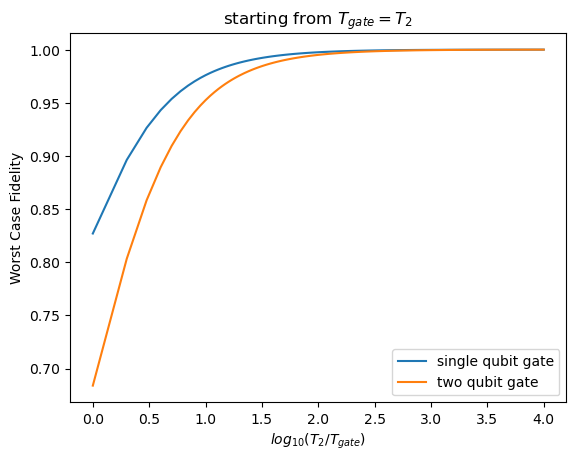

In [62]:
T2_list = list(np.linspace(Tgate*1, Tgate*20, 20, endpoint=True))+list(np.linspace(Tgate*20, Tgate*120, 50, endpoint=False))+list(np.geomspace(Tgate*125, Tgate*1000, 25, endpoint=False))+list(np.geomspace(Tgate*1000, Tgate*10000, 25, endpoint=True))

plus = 1/np.sqrt(2)*(basis(2,0)+basis(2,1))
T1 = 1
f_worst_1q = []
f_worst_2q = []
start = time.time()
Tgate=1

for T2 in T2_list:

    qubit1 = InCoherentQuantumRegister(1,plus*plus.dag(), T1=1, T2 = T2, Tgate=1, dt = 1/20)
    qubit2 = InCoherentQuantumRegister(2,tensor([plus*plus.dag(),plus*plus.dag()]), T1=1, T2 = T2, Tgate=1, dt = 1/20)
    qubit1.setError(dephase = True, amplitude_damp=False)
    qubit2.setError(dephase = True, amplitude_damp=False)
    qubit2.run([[('i',None,None,1)]])
    qubit1.run([[('i',None,None,1)]])
    f_worst_1q.append(fidelity(plus*plus.dag(), qubit1.state))
    f_worst_2q.append(fidelity(tensor([plus*plus.dag(),plus*plus.dag()]), qubit2.state))


start = 0
end = 1000
plt.style.use('default')
x = np.log10(T2_list)
plt.xlabel('$log_{10}(T_2/T_{gate})$')
plt.plot(x[start:end], f_worst_1q[start:end], label = 'single qubit gate')
plt.plot(x[start:end], f_worst_2q[start:end], label = 'two qubit gate')
plt.style.use('default')
plt.ylabel('Worst Case Fidelity')
plt.title('starting from $T_{gate}=T_2$')
plt.legend()
plt.show()

Now, we create the graphs for the sensing using the extracted data and the map to worst case two qubit gate fidelity. default is using the whole data.
you can turn 'show_flagged' True or False, and switch between x points of worst-case single (x_points=single)
 or two qubit (x_points=two) fidelities, or just use the log of $T_2$ with x_points='T2'

120
120
75
75


C:\Users\owner\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\owner\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\owner\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


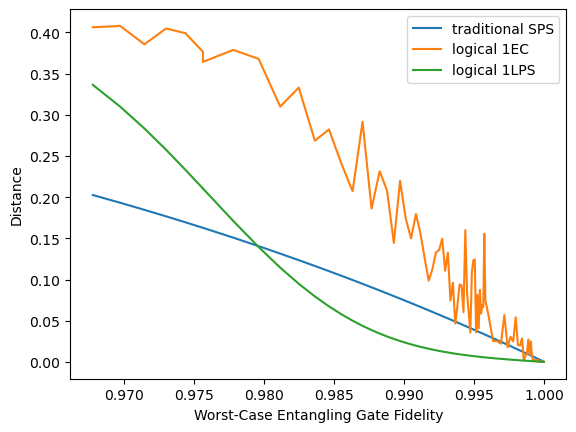

In [63]:
show_flagged = False
start = 0
end = 120
x_points = 'two'
x = np.log10(T2_list[start:end])
if x_points == 'single':
    start = 10
    x=f_worst_1q[start:end]
elif x_points == 'two':
    start = 14
    x=f_worst_2q[start:end]



if show_flagged:
    start =20
    end = 95
size = 10
plt.style.use('default')

plt.xlabel('$log_{10}(T_{2}/T_{gate})$')
if x_points == 'single':
    plt.xlabel('Worst-Case Single Gate Fidelity')
elif x_points == 'two':
    plt.xlabel('Worst-Case Entangling Gate Fidelity')
plt.legend(fontsize = size)

plt.plot(x, np.array(D_tSPS[start:end]), label='traditional SPS')
plt.plot(x, np.array(D_lEC[start:end]), label='logical 1EC')
plt.plot(x, np.array(D_lLPS[start:end]), label='logical 1LPS')
if show_flagged:
    plt.plot(x, np.array(D_lFTEC), label='flagged logical 1EC')
    plt.plot(x, np.array(D_lFTLPS), label='flagged logical 1LPS')

plt.ylabel('Distance')
# plt.ylim(0,1)
plt.legend()
plt.show()

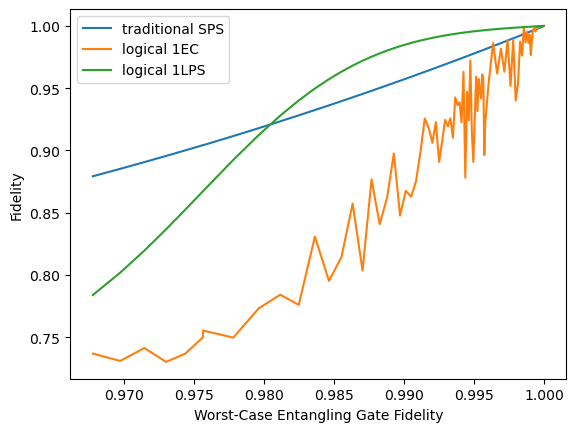

In [64]:

plt.xlabel('$log_{10}(T_{2}/T_{gate})$')
if x_points == 'single':
    plt.xlabel('Worst-Case Single Gate Fidelity')
elif x_points == 'two':
    plt.xlabel('Worst-Case Entangling Gate Fidelity')
plt.legend(fontsize = size)

plt.plot(x, np.array(f_tSPS[start:end]), label='traditional SPS')
plt.plot(x, np.array(f_lEC[start:end]), label='logical 1EC')
plt.plot(x, np.array(f_lLPS[start:end]), label='logical 1LPS')
if show_flagged:
    plt.plot(x, np.array(f_lFTEC), label='flagged logical 1EC')
    plt.plot(x, np.array(f_lFTLPS), label='flagged logical 1LPS')

plt.legend(fontsize = size)
plt.ylabel('Fidelity')
plt.legend()
plt.show()

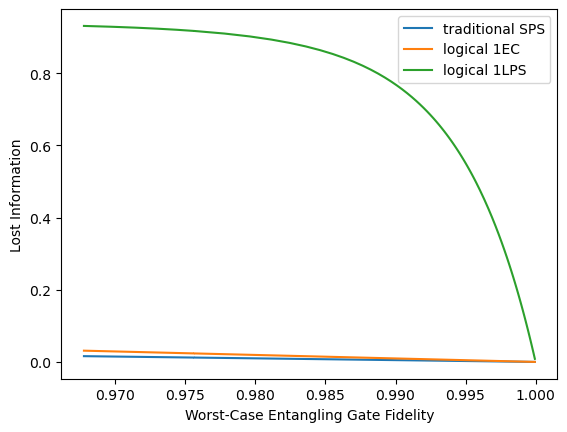

In [65]:
plt.xlabel('$log_{10}(T_{2}/T_{gate})$')
if x_points == 'single':
    plt.xlabel('Worst-Case Single Gate Fidelity')
elif x_points == 'two':
    plt.xlabel('Worst-Case Entangling Gate Fidelity')
plt.legend(fontsize = size)

plt.plot(x, np.array(li_tSPS[start:end]), label='traditional SPS')
plt.plot(x, np.array(li_lEC[start:end]), label='logical 1EC')
plt.plot(x, np.array(li_lLPS[start:end]), label='logical 1LPS')
if show_flagged:
    plt.plot(x, np.array(li_lFTEC), label='flagged logical 1EC')
    plt.plot(x, np.array(li_lFTLPS), label='flagged logical 1LPS')

plt.legend(fontsize = size)
plt.ylabel('Lost Information')
plt.legend()
plt.show()

And Finally to show the crossing point, we calculate the error probability as $1-F^2$ for the whole algorithm and show a $p^3$ dependence


[ 4.16149921e+01 -8.37491958e-01  1.47063737e-01  5.98692249e-05]


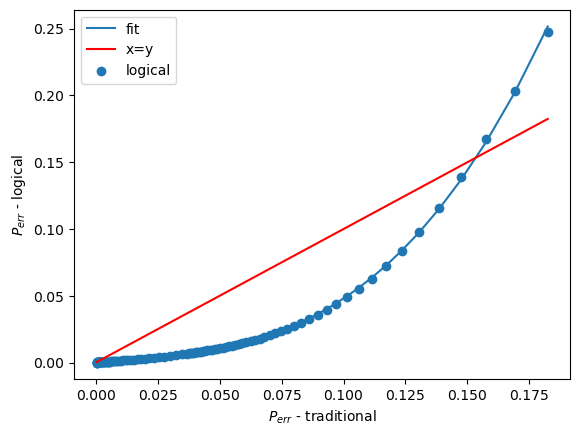

In [82]:
start = 10
end = 120
P_l = 1-(np.array(f_lLPS[start:end]))**2 #error probability for the whole logical circuit
P_t = 1-(np.array(f_tSPS[start:end]))**2 # error probability for the whole algorithm


def func(x,a,b,c,d):
    return a * x**3 + b* x**2 + c * x + d

popt, pcov = curve_fit(func, P_t[start:end], P_l[start:end])
print(popt)
# popt1, pcov1 = curve_fit(func1, P_t[start:end], P_l[start:end])
# print(popt1)

plt.xlabel('$P_{err}$ - traditional')
plt.plot(np.array(P_t)[start:end], func(P_t,*popt)[start:end], label = 'fit')
# plt.errorbar(np.array(P_t), np.array(P_ft), yerr = dp_ft, xerr = dp_t, fmt='o', label = 'fault-tolerant')
plt.scatter(np.array(P_t)[start:end], np.array(P_l)[start:end], label = 'logical')
plt.plot(np.array(P_t)[start:end], np.array(P_t)[start:end], color = 'r', label='x=y')
plt.legend()
plt.ylabel('$P_{err}$ - logical')
plt.legend(loc='upper left')
# plt.ylim(0,0.16)
# plt.xlim(0,0.1)
# plt.axis('scaled')
plt.show()

C:\Users\owner\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[2.78657629e+01 1.00000000e+00 1.00000000e+00 1.05413832e-02]


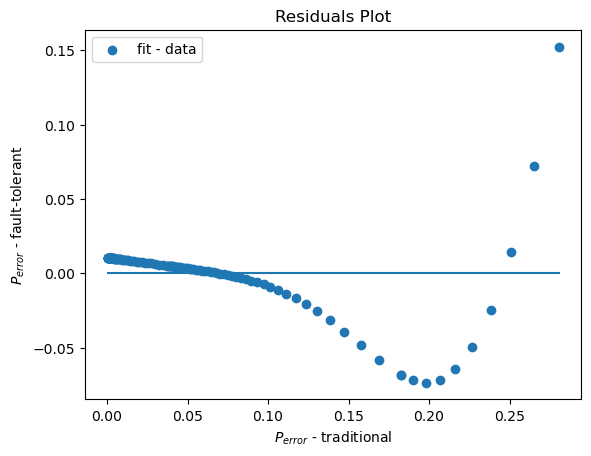

In [74]:
popt, pcov = curve_fit(func, P_t, P_l)
print(popt)
plt.xlabel('$P_{error}$ - traditional')
plt.title('Residuals Plot')
plt.plot(np.array(P_t), [0 for a in range(len(P_t))])
plt.scatter(np.array(P_t), func(P_t,*popt)-np.array(P_l), label = 'fit - data')
# plt.plot(np.array(P_t), np.array(P_t), color = 'r', label='x=y')
plt.legend()
plt.ylabel('$P_{error}$ - fault-tolerant')
plt.legend(loc='upper left')
# plt.ylim(0,0.16)
# plt.xlim(0,0.1)
# plt.axis('scaled')
plt.show()

# To create the data
### DELETE manually (for safety) the folder 'logical_FT_improved_trad_SPS_LT_[X]' from 'data\\averageing_fidelity\\Kitaev' and then run the following code blocks:

data was created for the following parameters:

for (startp,endp) = (1,20) and num_points=20 and num_angles=10 set name='_VST'

for (startp,endp) = (20,120) and num_points=50 and num_angles=50 set name=''

for (startp,endp) = (125,1000) and num_points=25 and num_angles=10 set name='_LT'

for (startp,endp) = (1000,10000) and num_points=25 and num_angles=10 set name='_VLT'

now set the desired parameters in the cell below

#### Note that flagged data has been saved only for the middle two (T2 from 125 to 1000)

In [2]:
startp=1
endp=100
name=''
num_points = 50
num_angles = 50
print('parameters set')

parameters set


In [ ]:
main(num_points,num_angles,'traditionalSPS', startp, endp, name=name)

In [ ]:
main(num_points,num_angles,'traditional', startp, endp, name=name)

In [ ]:
main(num_points,num_angles,'logicalFT1EC1LPS', startp, endp, name=name)

In [ ]:
main(num_points,num_angles,'logical1EC', startp, endp, name=name) #LPS

In [ ]:
main(num_points,num_angles,'logical1LPS', startp, endp, name=name) #EC